---
# Projeto - Caderno Modelo
---

**Machine Learning em Projetos (Erick Muzart e Fernando Melo)**


# **Descrição do projeto de machine learning**

Antes de escrever qualquer código, precisamos entender o problema que queremos resolver e fazer uma descrição eficiente do projeto, visando a comunicação simples e rápida do objetivo do projeto para técnicos, gestores e colaboradores.

### **1 - Descrição do problema ou tarefa:**

Predições de possíveis locais de Crimes baseados nos dados de CVLIs do NEAC

### **2 - Descrição da solução de IA:**

Treinamento supervisionado de modelo de regressão para predição com base nos dados das dimensões dos locais e tipo criminal que está relacionado com as CVLIs, com base em 7 atributos (características).
São alguns locais possíveis: Via Pública, Imediações de Casa, Próximo de Casa, Porta de Casa, Dentro de Casa, Presídio, Residência, Vegetação, Bar, Estabelecimento Comercial, entre outros …

### **3 - Fonte de dados: (mudanças aqui)**

Dados do NEAC/SSPAL (Núcleo de Estatística e Análise Criminais)

- NEAC_CVLI_2023.csv - base de validação
  https://drive.google.com/file/d/1L7fHdQ5NSE8l22NV8xy-w4hHV9xMRktg/view?usp=sharing

- NEAC_CVLI_2022.csv - base de testes
  https://drive.google.com/file/d/1l1WlIaNth_9il2OGCzWcCc1KrRyjM19r/view?usp=sharing

- NEAC_CVLI.csv - Dados - base de treinamento (2012 ate 2022)
  https://drive.google.com/file/d/1pMOhYHnam6pCs8tt4yLMQDZGX_anK4LV/view?usp=sharing

### **4 - Variáveis independentes (preditoras ou "features"):**

- Tipo ciminal - SUBJETIVIDADE_COMPLEMANTAR (str)
- Instrumento - INSTRUMENTO (str)
- Data do Fato - DATA_HORA_FATO (DateTime)
- Turno do Fato - TURNO (str)
- Cor ou Raça da Vítima - COR_RACA_VITIMA (str)
- Sexo da Vítima - SEXO_VITIMA (str)
- Dia da Semana - DIA_SEMANA (num)

### **5 - Variável dependente (resposta ou "target"):**

Local do Fato - LOCAL_FATO (str)

### **6- Base de dados/estrutura de dados:**

| #   | Description | Field                      | Non-Null Count | Data type | X ou y | Drop |
| --- | ----------- | :------------------------- | :------------- | :-------- | :----- | :--- |
| 0   |             | Unnamed: 0                 | 63 non-null    | int64     | -      | \*   |
| 1   |             | created_on                 | 63 non-null    | object    | -      | \*   |
| 2   |             | operation                  | 63 non-null    | object    | -      | \*   |
| 3   |             | property_type              | 63 non-null    | object    | -      | \*   |
| 4   |             | place_name                 | 63 non-null    | object    | -      | \*   |
| 5   |             | place_with_parent_names    | 63 non-null    | object    | -      | \*   |
| 6   |             | geonames_id                | 0 non-null     | float64   | -      | \*   |
| 7   |             | lat_lon                    | 41 non-null    | object    | -      | \*   |
| 8   |             | lat                        | 41 non-null    | float64   | -      | \*   |
| 9   |             | lon                        | 41 non-null    | float64   | -      | \*   |
| 10  |             | price                      | 63 non-null    | float64   | y      | \*   |
| 11  |             | currency                   | 63 non-null    | object    | -      | \*   |
| 12  |             | price_aprox_local_currency | 63 non-null    | float64   | X      | \*   |
| 13  |             | price_aprox_usd            | 63 non-null    | float64   | X      |      |
| 14  |             | surface_total_in_m2        | 16 non-null    | float64   | X      | \*   |
| 15  |             | surface_covered_in_m2      | 57 non-null    | float64   | X      | \*   |
| 16  |             | price_usd_per_m2           | 56 non-null    | float64   | X      |      |
| 17  |             | price_per_m2               | 56 non-null    | float64   | X      |      |
| 18  |             | floor                      | 7 non-null     | float64   | X      |      |
| 19  |             | rooms                      | 22 non-null    | float64   | X      |      |
| 20  |             | expenses                   | 11 non-null    | float64   | -      | \*   |
| 21  |             | properati_url              | 63 non-null    | object    | -      | \*   |
| 22  |             | description                | 63 non-null    | object    | -      | \*   |
| 24  |             | image_thumbnail            | 63 non-null    | object    | -      | \*   |
| 25  |             | location                   | 41 non-null    | object    | -      | \*   |


## I - Introdução


In [144]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd '/content/drive/MyDrive/Colab Notebooks/bootcamp/dados'
%matplotlib inline

In [145]:
# Importar bibliotecas (pandas etc)
import os
import sys
import sklearn
import graphviz
import pandas as pd
import graphviz.backend as be
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
import dtreeviz

# Importar algoritmo
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from mpl_toolkits.mplot3d import axes3d

random_state = 1234  # get reproducible trees
# Importar dados

# II - Limpeza e tratamento de dados


## 1. Preparação


In [146]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg'
%matplotlib inline

if 'google.colab' in sys.modules:
    !pip install -q dtreeviz
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Colab Notebooks/bootcamp/dados'
# else:
#     path ='./dados/'

## 2. Análise exploratória do dados


In [147]:
# Ler dados
dataset_url = "./dados/NEAC_CVLI.csv"

dataset = pd.read_csv(dataset_url)
# salbando uma cópia
dataset.to_csv("./dados/NEAC_CVLI_bkp.csv")

### Campos Categóricos


In [148]:
# SUBJETIVIDADE_COMPLEMENTAR
agrupado = dataset.groupby(["SUBJETIVIDADE_COMPLEMENTAR"]).size()
agrupado

SUBJETIVIDADE_COMPLEMENTAR
Estupro com Resultado Morte           15
Feminicídio                          248
Homicídio                          17243
Infanticídio                           3
Lesão Corporal Seguida de Morte      116
Resistência com Resultado Morte      948
Roubo com Resultado Morte            551
dtype: int64

<Axes: xlabel='SUBJETIVIDADE_COMPLEMENTAR'>

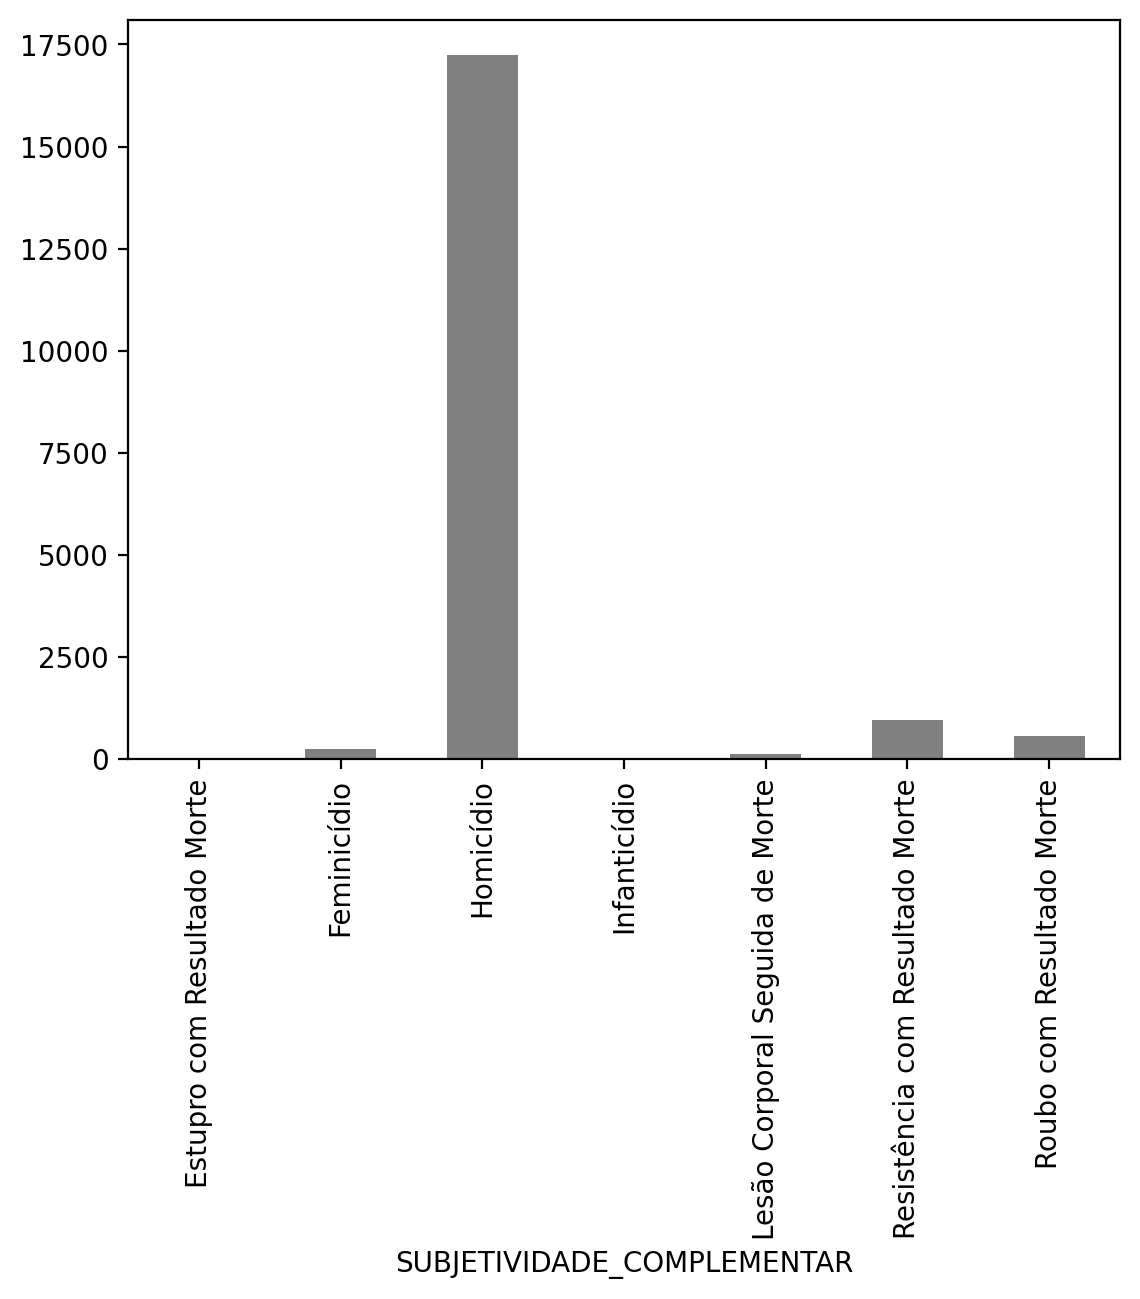

In [149]:
agrupado.plot.bar(color="gray")

In [150]:
# INSTRUMENTO_UTILIZADO
agrupado = dataset.groupby(["INSTRUMENTO_UTILIZADO"]).size()
agrupado

INSTRUMENTO_UTILIZADO
ACHADO DE CADÁVER           1
ACIDENTE                    2
ACIDENTE DE TRÂNSITO        1
AFOGAMENTO                  7
ASFIXIA MECÂNICA          157
ATROPELAMENTO               6
BRANCA                   2483
CARBONIZADO                 9
CHOQUE ELÉTRICO             1
ESPANCAMENTO             1046
INTOXICAÇÃO                 9
LINCHAMENTO                42
NI                        355
OUTROS                     53
PAF                     14524
PAF/B                     406
QUEDA                       2
QUEIMADURA                 20
dtype: int64

<Axes: xlabel='INSTRUMENTO_UTILIZADO'>

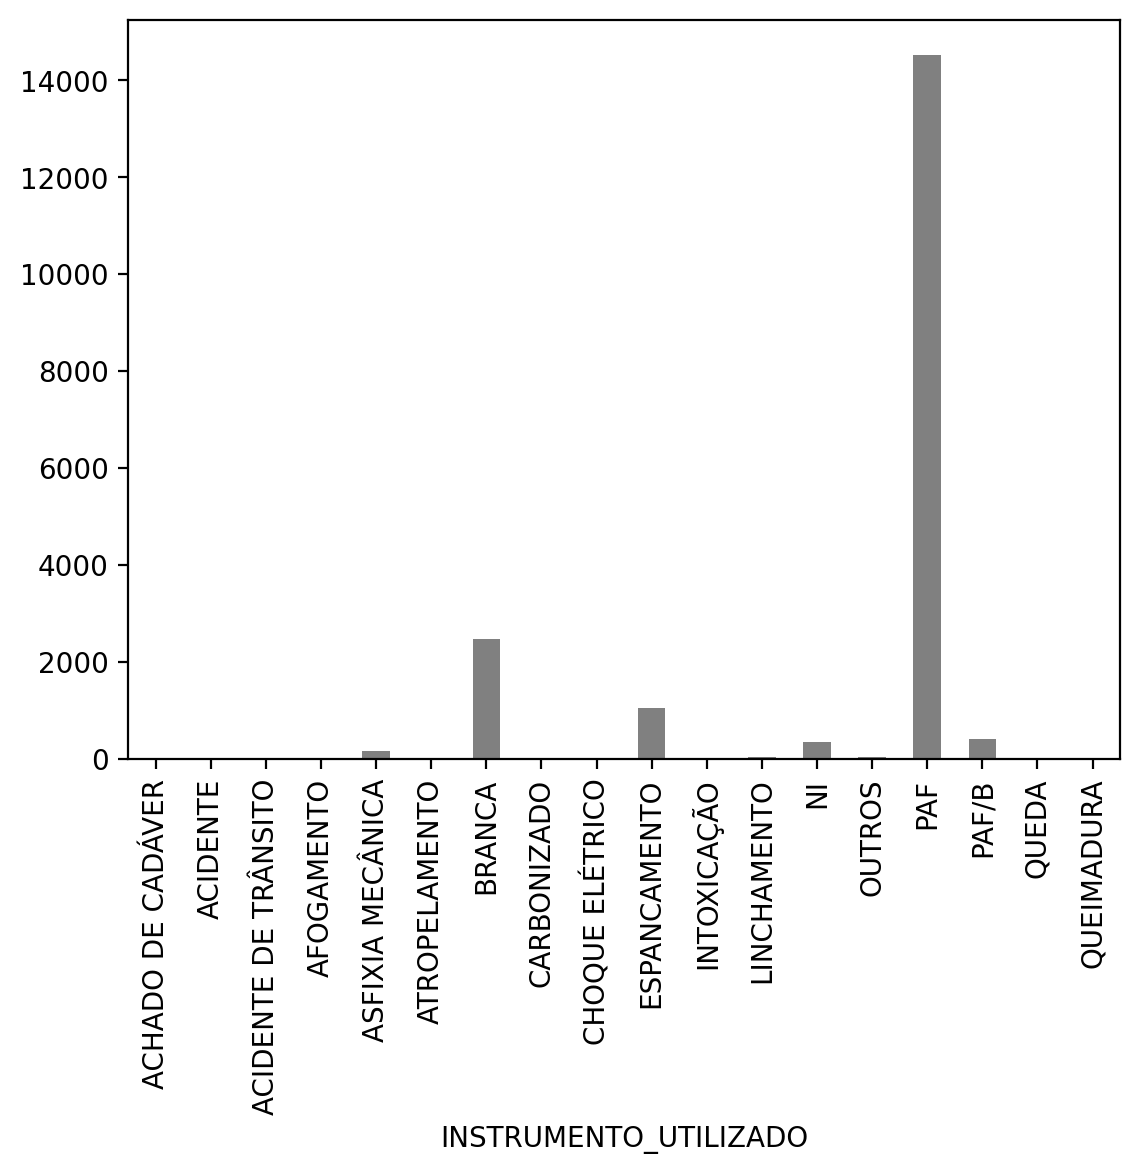

In [151]:
agrupado.plot.bar(color="gray")

In [152]:
# ENDERECO_FATO
agrupado = dataset.groupby(["ENDERECO_FATO"]).size()
agrupado

ENDERECO_FATO
 Rua Professor José C. Viana, Várzea da Cohab, próximo a Ponte do mata-quatro          1
 Rua Santa Luzia, próximo a feirinha, porta da Paper.net                               1
 Rua São Vicente                                                                       1
 Rua Tancredo Neves cruzamento com a Rua Maria Pureza, Colégio São José                1
 Sítio Bela Vista, Goiabeiras, estrada de barro que liga o Bebedouro a Fernão Velho    1
                                                                                      ..
Área de Canavial                                                                       3
Área de Mata Atlântica                                                                 1
Área de Mata Fechada                                                                   1
Área de plantio da Antiga Usina Utinga Leão                                            1
Última rua das Casas Novas                                                             1
Length:

In [153]:
# agrupado.plot.bar(color="gray")

In [154]:
# TURNO
agrupado = dataset.groupby(["TURNO"]).size()
agrupado

TURNO
Madrugada    3333
Manhã        3301
Noite        8017
Tarde        4473
dtype: int64

<Axes: xlabel='TURNO'>

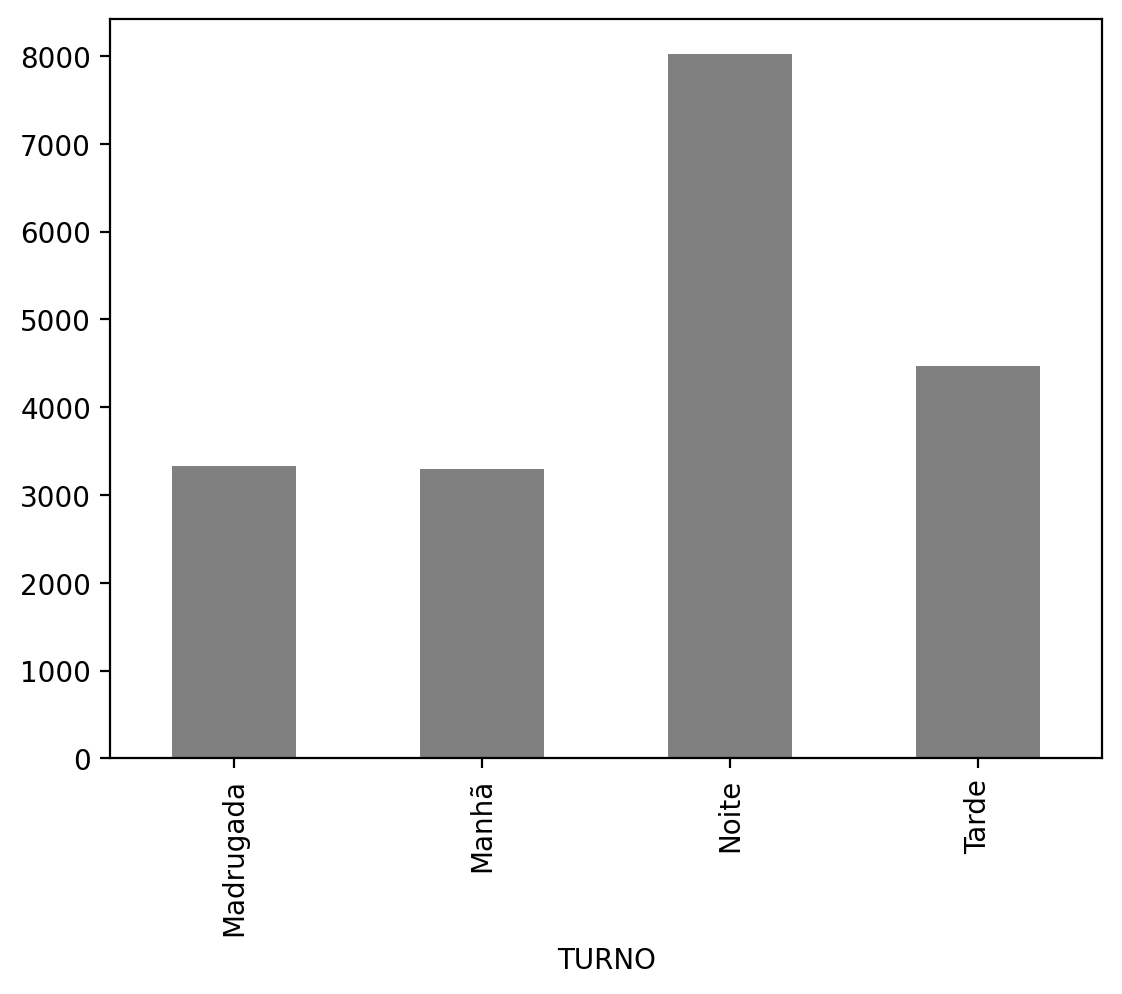

In [155]:
agrupado.plot.bar(color="gray")

In [156]:
# SEXO_VITIMA
agrupado = dataset.groupby(["SEXO_VITIMA"]).size()
agrupado

SEXO_VITIMA
Feminino      1182
Masculino    17942
dtype: int64

<Axes: xlabel='SEXO_VITIMA'>

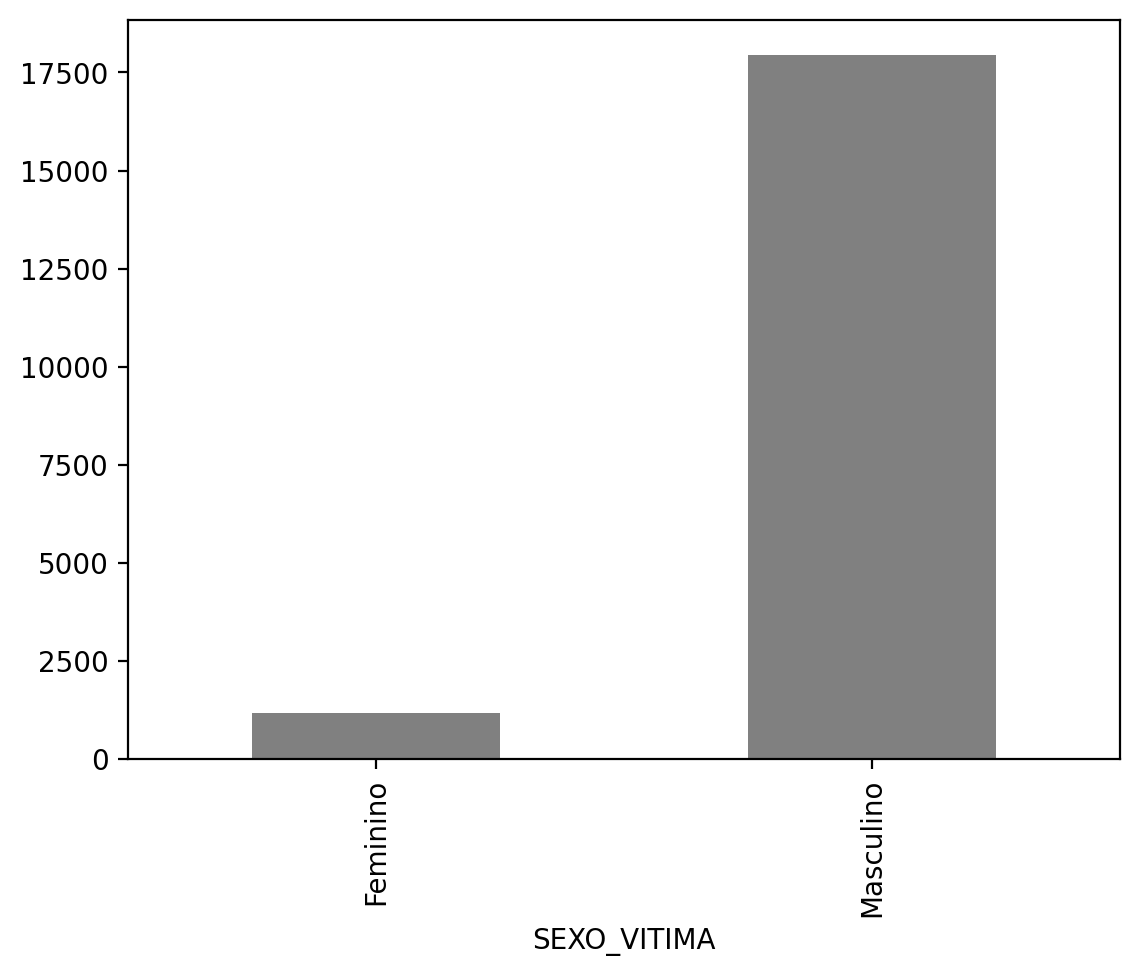

In [157]:
agrupado.plot.bar(color="gray")

In [158]:
# COR_RACA_VITIMA
agrupado = dataset.groupby(["COR_RACA_VITIMA"]).size()
agrupado

COR_RACA_VITIMA
Amarela        70
Branca       2362
Indígena        6
NI           1066
Parda       14245
Preta        1375
dtype: int64

<Axes: xlabel='COR_RACA_VITIMA'>

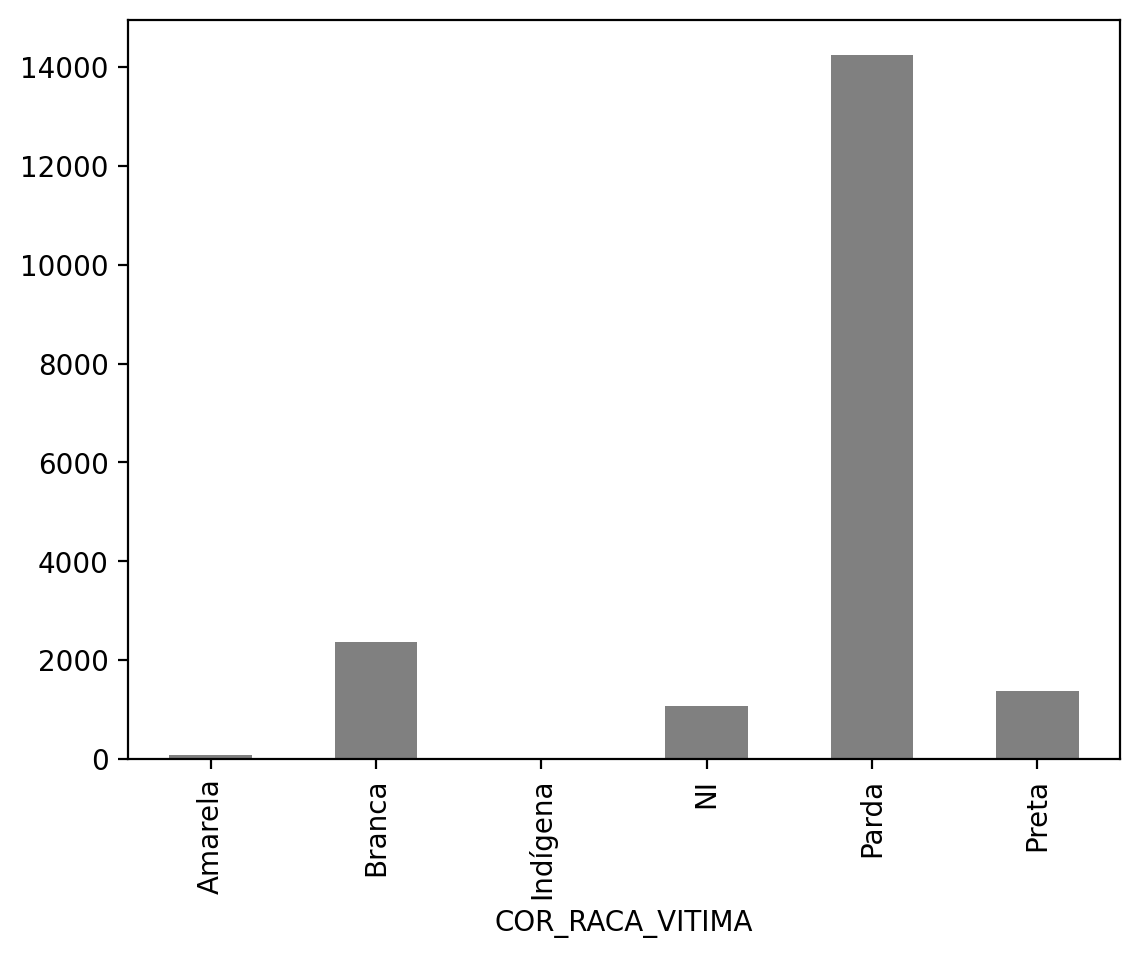

In [159]:
agrupado.plot.bar(color="gray")

In [160]:
# CIDADE_FATO
agrupado = dataset.groupby(["CIDADE_FATO"]).size()
agrupado

CIDADE_FATO
Anadia                      88
Arapiraca                 1371
Atalaia                    297
Barra de Santo Antônio     126
Barra de São Miguel         94
                          ... 
Teotônio Vilela            268
Traipu                      62
União dos Palmares         438
Viçosa                     157
Água Branca                 40
Length: 102, dtype: int64

In [161]:
# agrupado.plot.bar(color="gray")

In [162]:
# BAIRRO_FATO
agrupado = dataset.groupby(["BAIRRO_FATO"]).size()
agrupado

BAIRRO_FATO
Abolição                  19
Alto do Cruzeiro          61
Antares                   82
Bairro de Fátima           1
Bairro não Informado      34
                        ... 
Xucurus                   13
Zona Rural              5363
Zona Rural Leste          50
Zona Rural Oeste          38
Zélia Barbosa Rocha       35
Length: 185, dtype: int64

In [163]:
# agrupado.plot.bar(color="gray")

In [164]:
# LOCAL_FATO
agrupado = dataset.groupby(["LOCAL_FATO"]).size()
agrupado

LOCAL_FATO
Acampamento                                                                                                                                    1
Alojamento                                                                                                                                     4
Açude                                                                                                                                         18
Bar                                                                                                                                          461
Barragem                                                                                                                                       3
                                                                                                                                            ... 
Zona Rural                                                                                                             

In [165]:
# agrupado.plot.bar(color="gray")

In [166]:
# OCUPACAO_VITIMA
agrupado = dataset.groupby(["OCUPACAO_VITIMA"]).size()
agrupado

OCUPACAO_VITIMA
0101-E/15-0056     1
15.946             1
Acionista          5
Administrador      3
Advogada           1
                  ..
Vigia de Rua       1
Vigia de rua       1
Vigilante         84
Zelador            1
aUTÔNOMO           1
Length: 280, dtype: int64

<Axes: xlabel='OCUPACAO_VITIMA'>

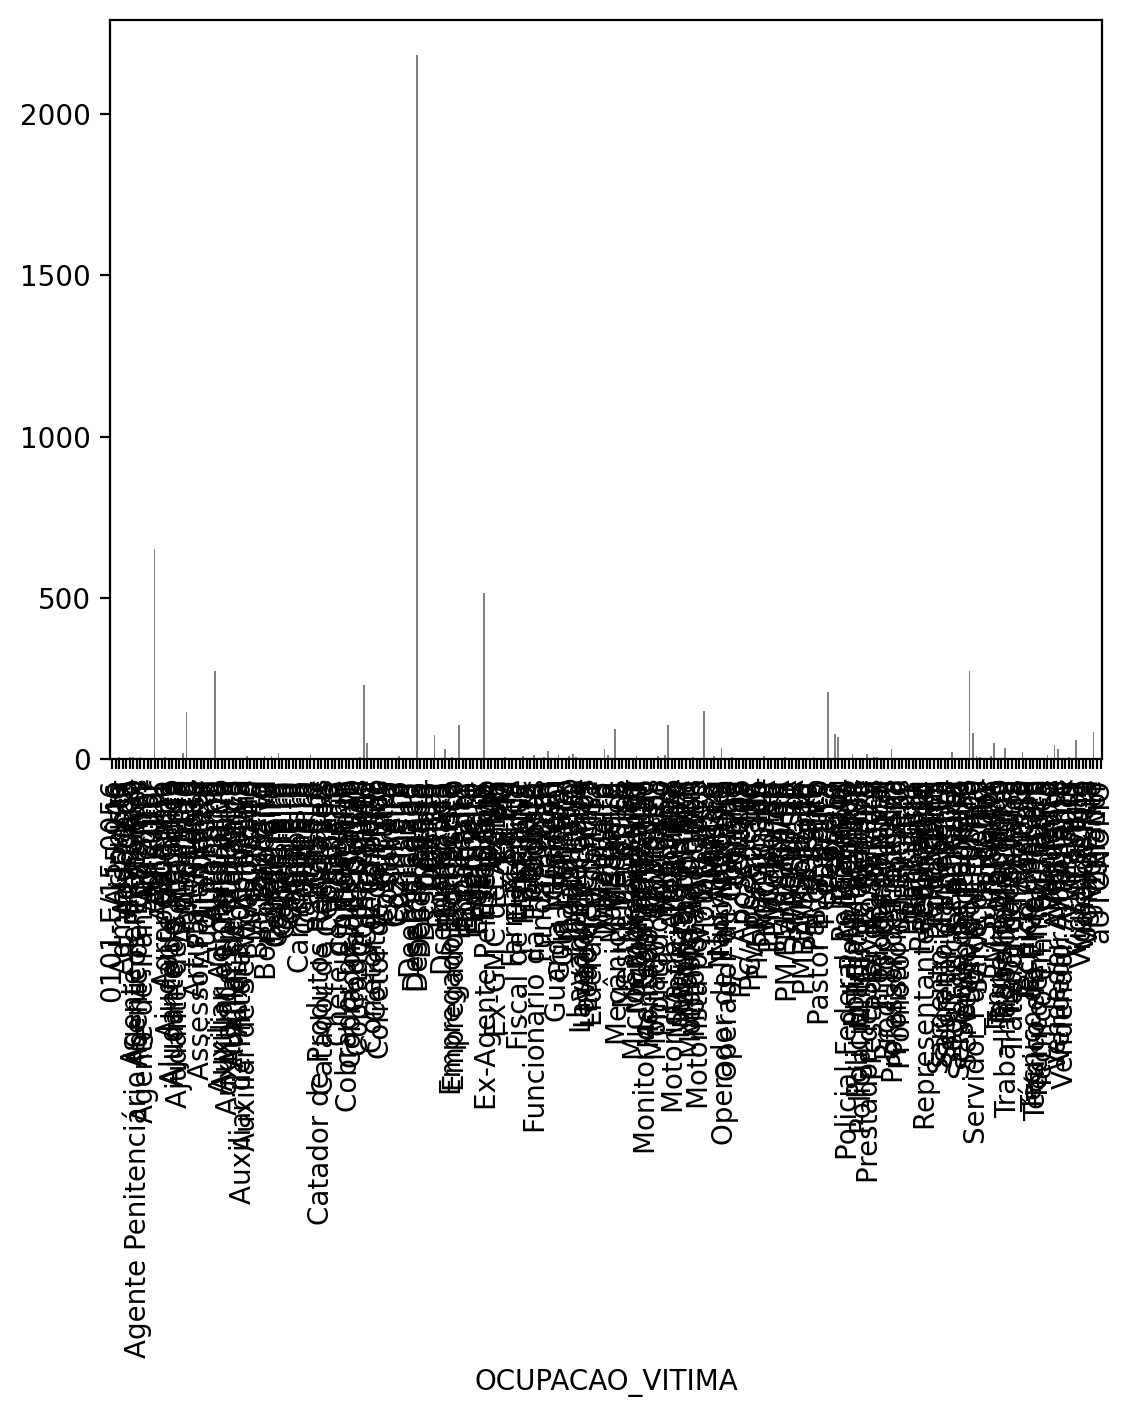

In [167]:
agrupado.plot.bar(color="gray")

In [168]:
# ESCOLARIDADE_VITIMA
agrupado = dataset.groupby(["ESCOLARIDADE_VITIMA"]).size()
agrupado

ESCOLARIDADE_VITIMA
Alfabetizado     707
Analfabeto       527
Fundamental     3163
Médio            668
NI              6717
Superior          91
dtype: int64

<Axes: xlabel='ESCOLARIDADE_VITIMA'>

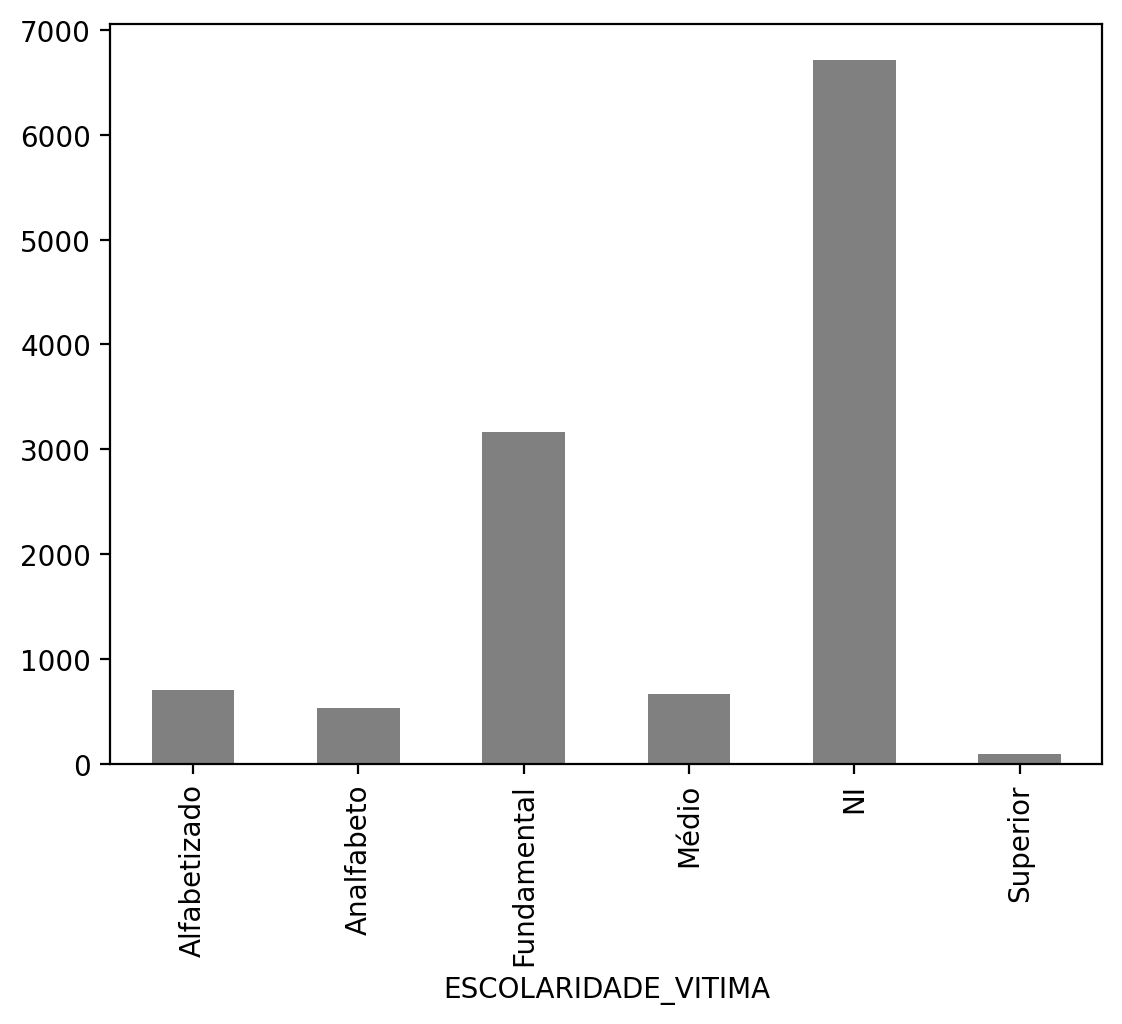

In [169]:
agrupado.plot.bar(color="gray")

In [170]:
# ESTADO_CIVIL_VITIM
agrupado = dataset.groupby(["ESTADO_CIVIL_VITIMA"]).size()
agrupado

ESTADO_CIVIL_VITIMA
Casado           1856
Companheiro       568
Divorciado          9
NI               7454
Separado          237
Solteiro         4395
União Estável      73
Viúvo              27
dtype: int64

<Axes: xlabel='ESTADO_CIVIL_VITIMA'>

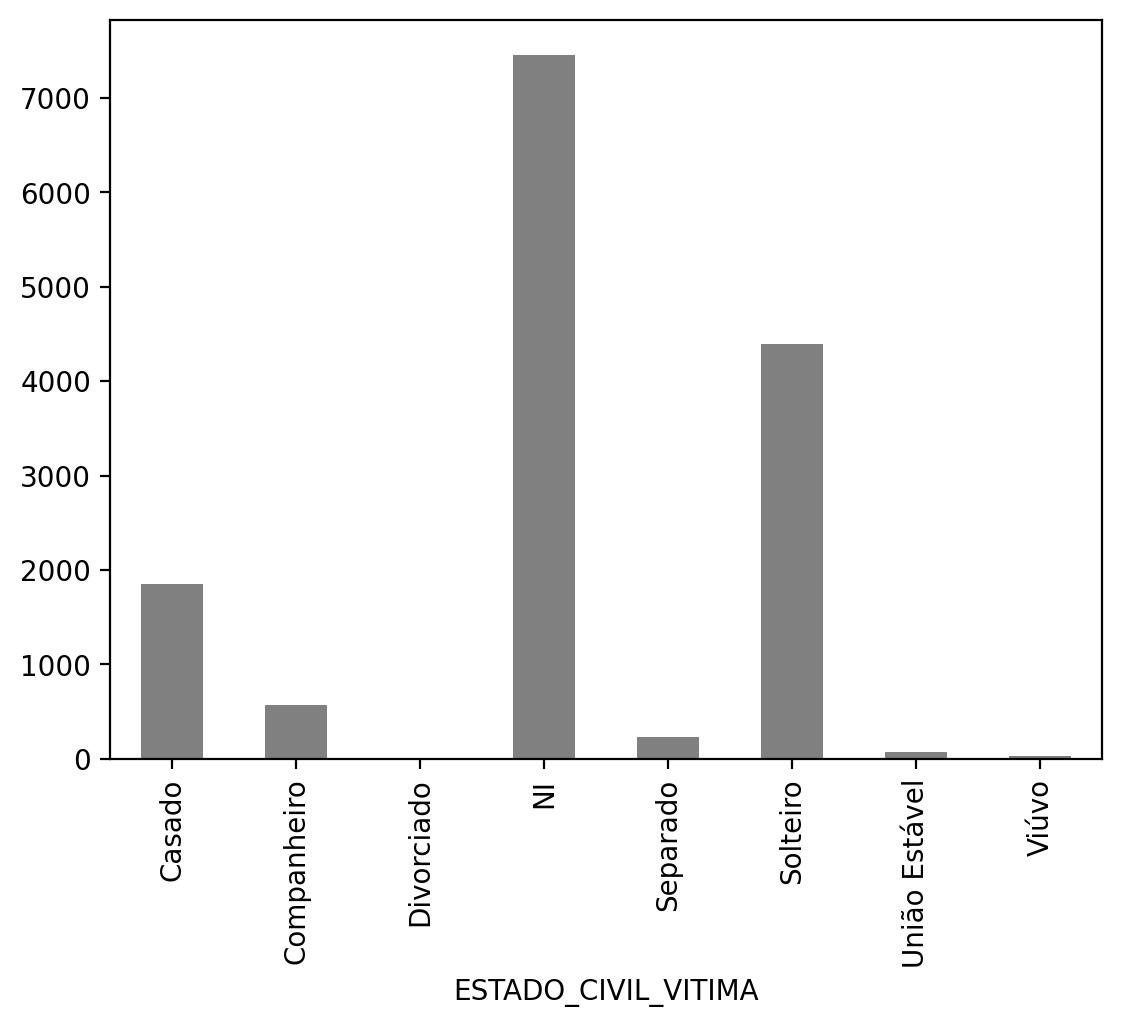

In [171]:
agrupado.plot.bar(color="gray")

### Campos númericos


In [172]:
# dados nulos
dataset.isnull().sum()

OBJECTID                          0
ID                                0
NIC                             696
SUBJETIVIDADE                     0
SUBJETIVIDADE_COMPLEMENTAR        0
INSTRUMENTO_UTILIZADO             0
DATA_HORA_FATO                    0
ANO_FATO                          0
MES_FATO                          0
MES_FATO_TEXTO                    0
DIA_FATO                          0
DIA_SEMANA_FATO                   0
HORA_FATO                         0
TURNO                             0
CIDADE_FATO                       0
BAIRRO_FATO                       0
RISP                              0
AISP                              0
ENDERECO_FATO                   207
PT_REF_FATO                   11996
LOCAL_FATO                       81
NOME_VITIMA                       0
ALCUNHA_VITIMA                13107
MAE_VITIMA                     1055
IDADE_VITIMA                    422
COR_RACA_VITIMA                   0
SEXO_VITIMA                       0
OCUPACAO_VITIMA             

#### NIC


In [173]:
# NIC
# dataset["NIC"].describe()

Text(0.5, 1.0, 'NIC')

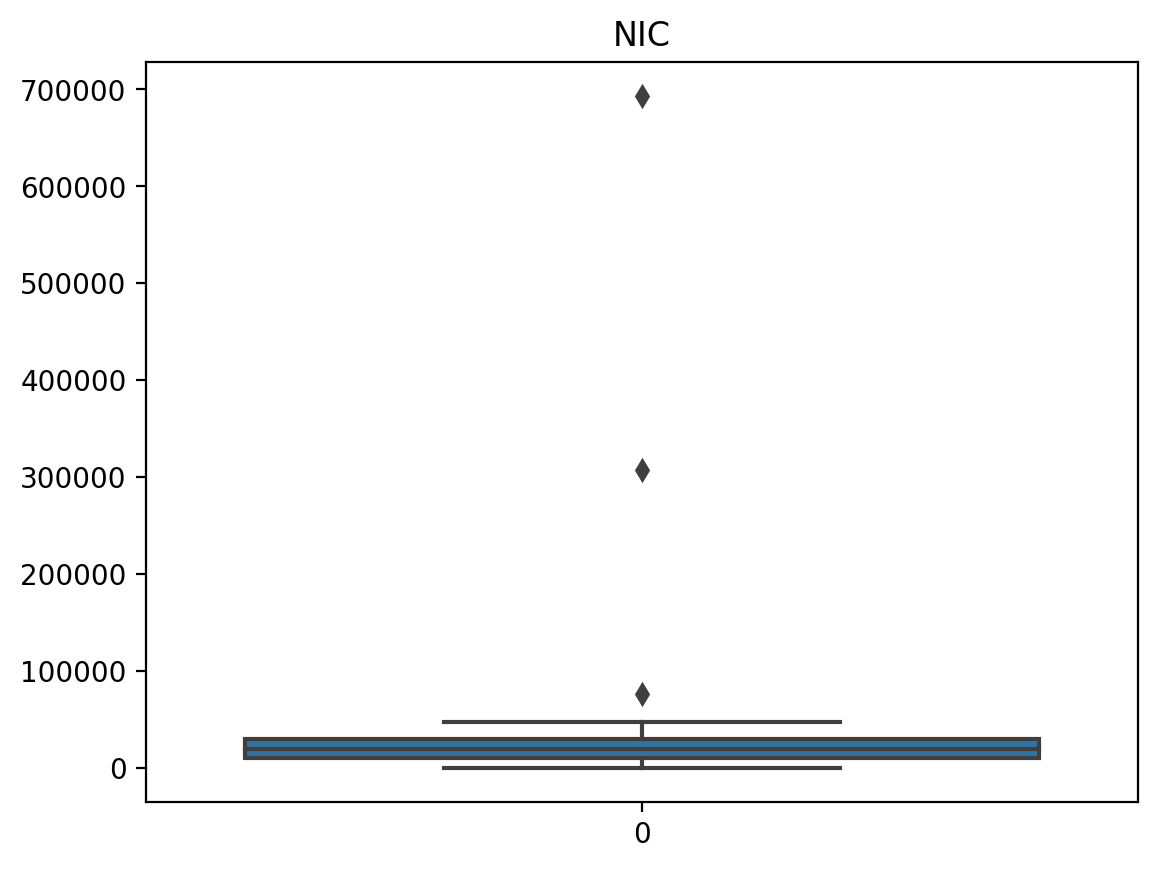

In [174]:
srn.boxplot(dataset["NIC"]).set_title("NIC")

Text(0.5, 1.0, 'NIC')

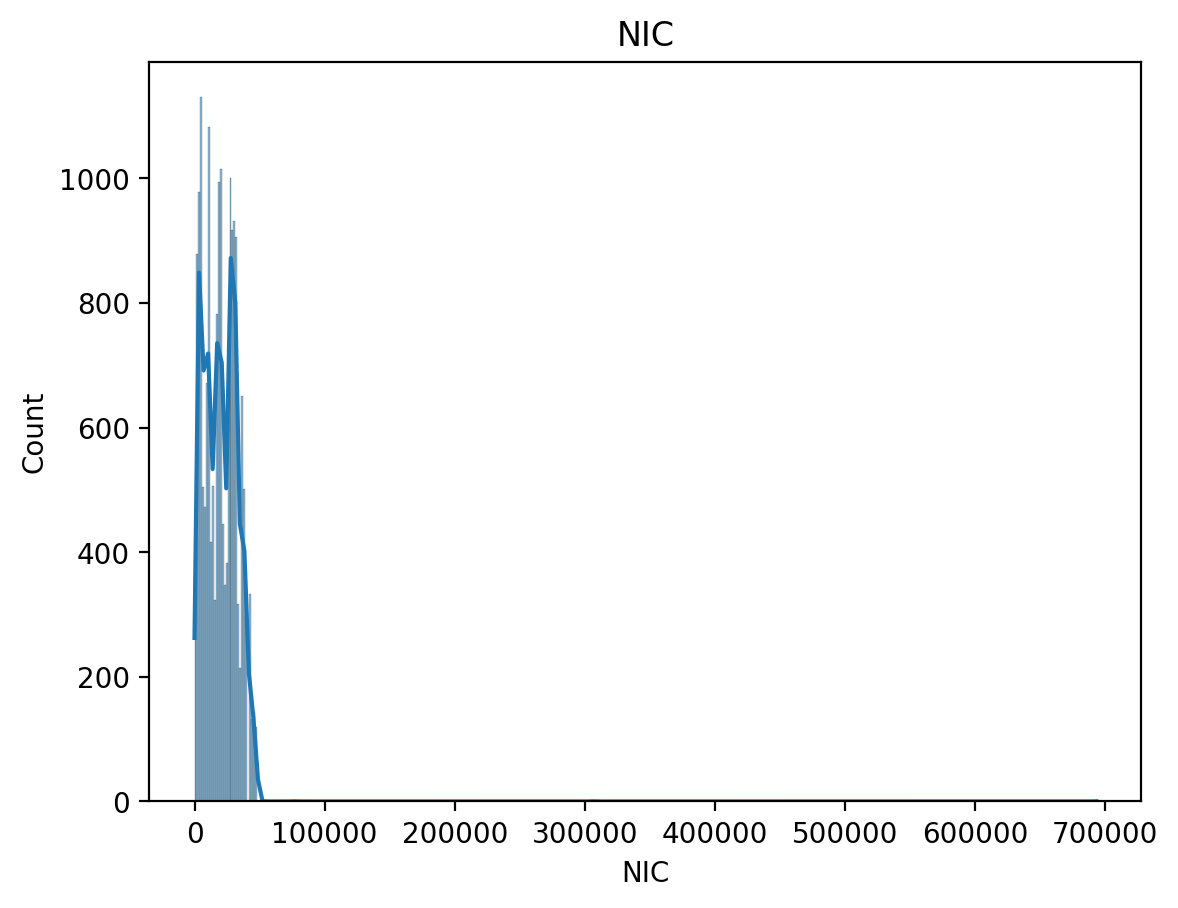

In [175]:
srn.histplot(dataset["NIC"], kde=True).set_title("NIC")

Text(0.5, 1.0, 'NIC')

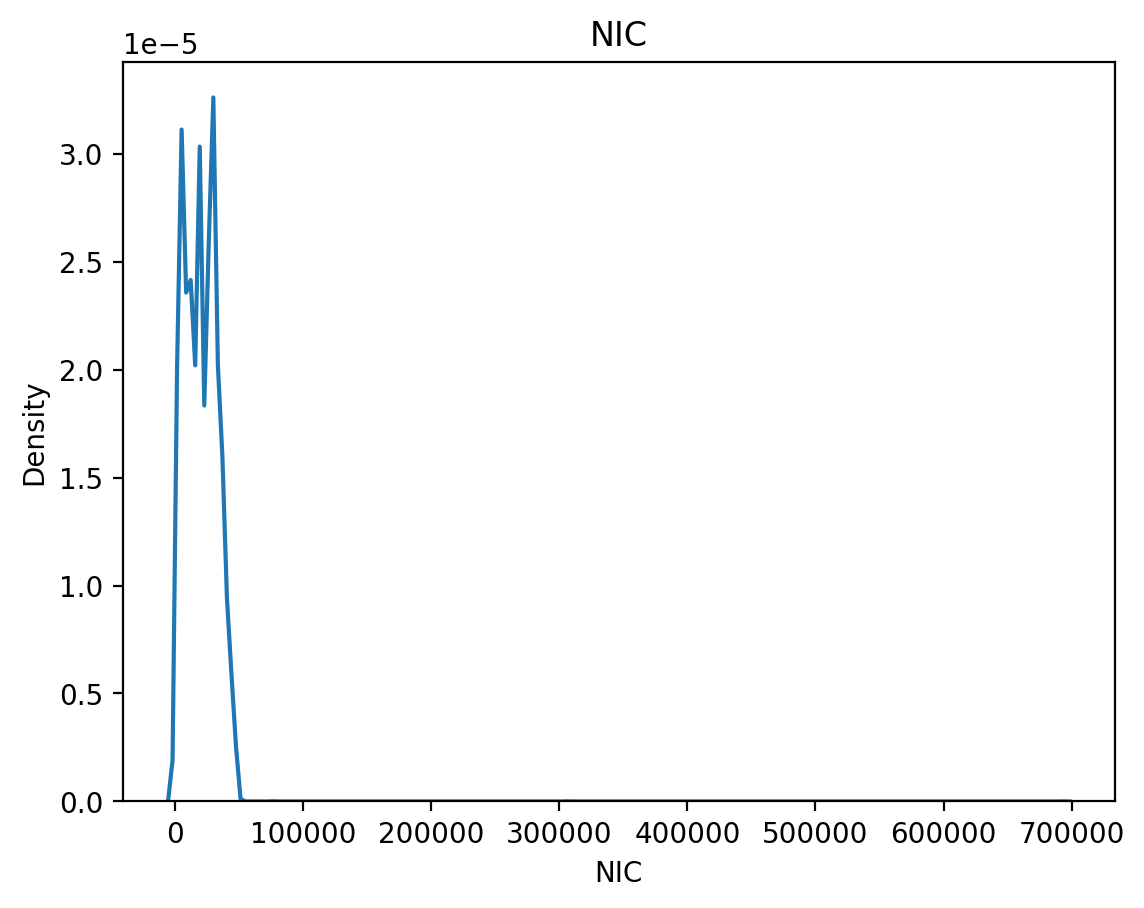

In [176]:
srn.kdeplot(dataset["NIC"]).set_title("NIC")

#### ANO_FATO


In [177]:
# ANO FATO
dataset["ANO_FATO"].describe()

count    19124.000000
mean      2016.409381
std          3.199350
min       2012.000000
25%       2014.000000
50%       2016.000000
75%       2019.000000
max       2023.000000
Name: ANO_FATO, dtype: float64

Text(0.5, 1.0, 'ANO_FATO')

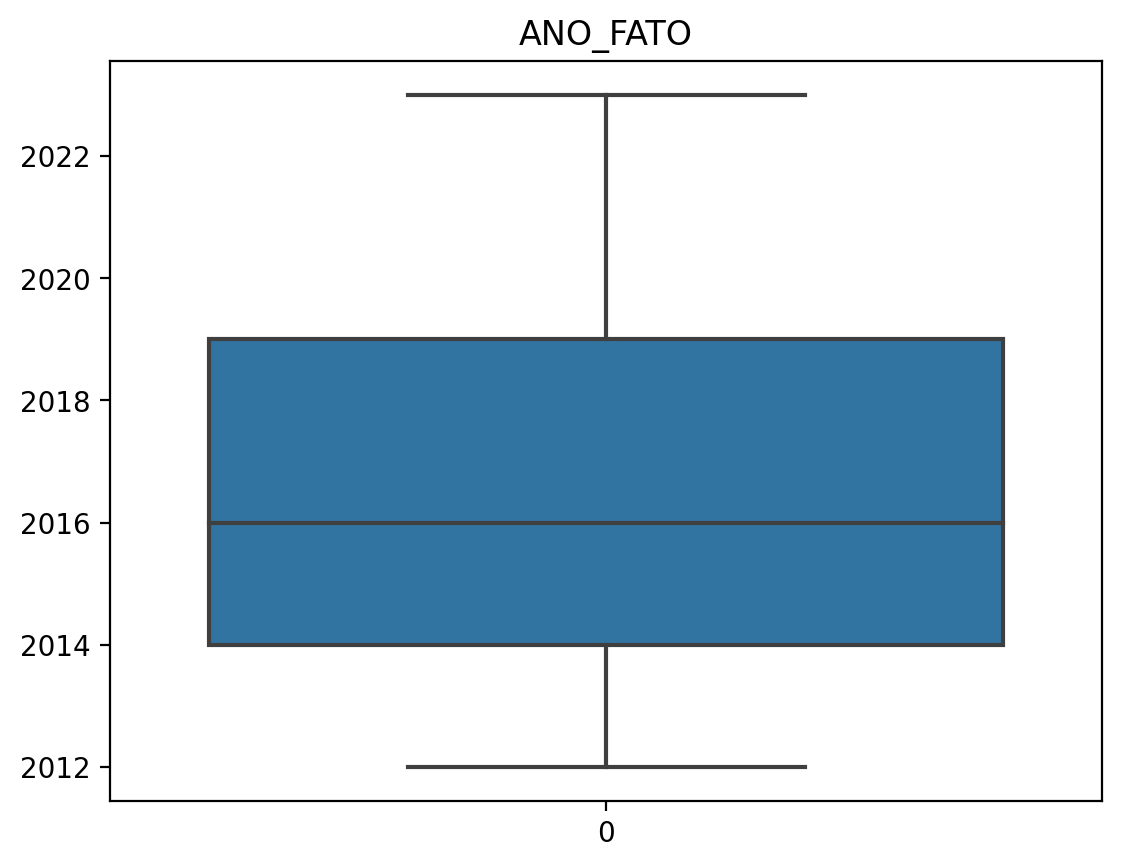

In [178]:
srn.boxplot(dataset["ANO_FATO"]).set_title("ANO_FATO")

Text(0.5, 1.0, 'ANO_FATO')

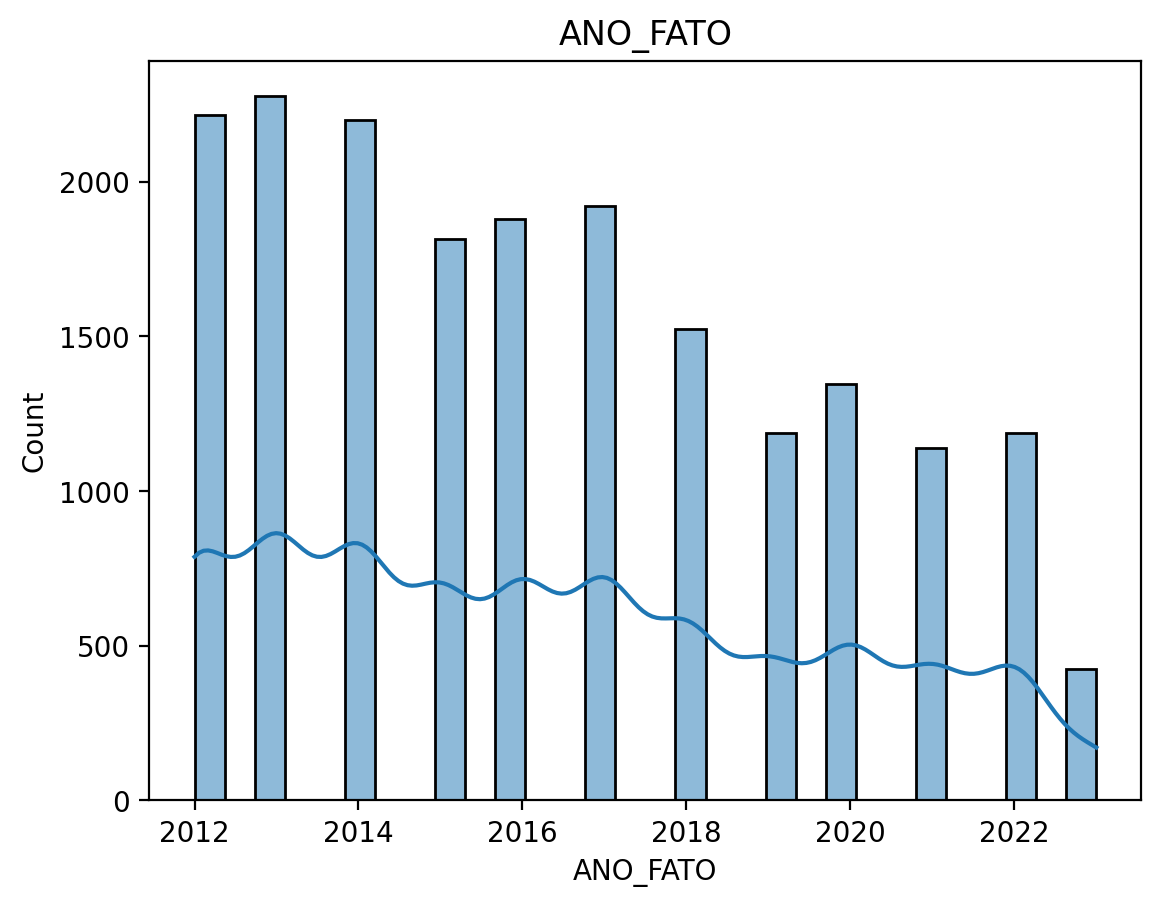

In [179]:
srn.histplot(dataset["ANO_FATO"], kde=True).set_title("ANO_FATO")

Text(0.5, 1.0, 'ANO_FATO')

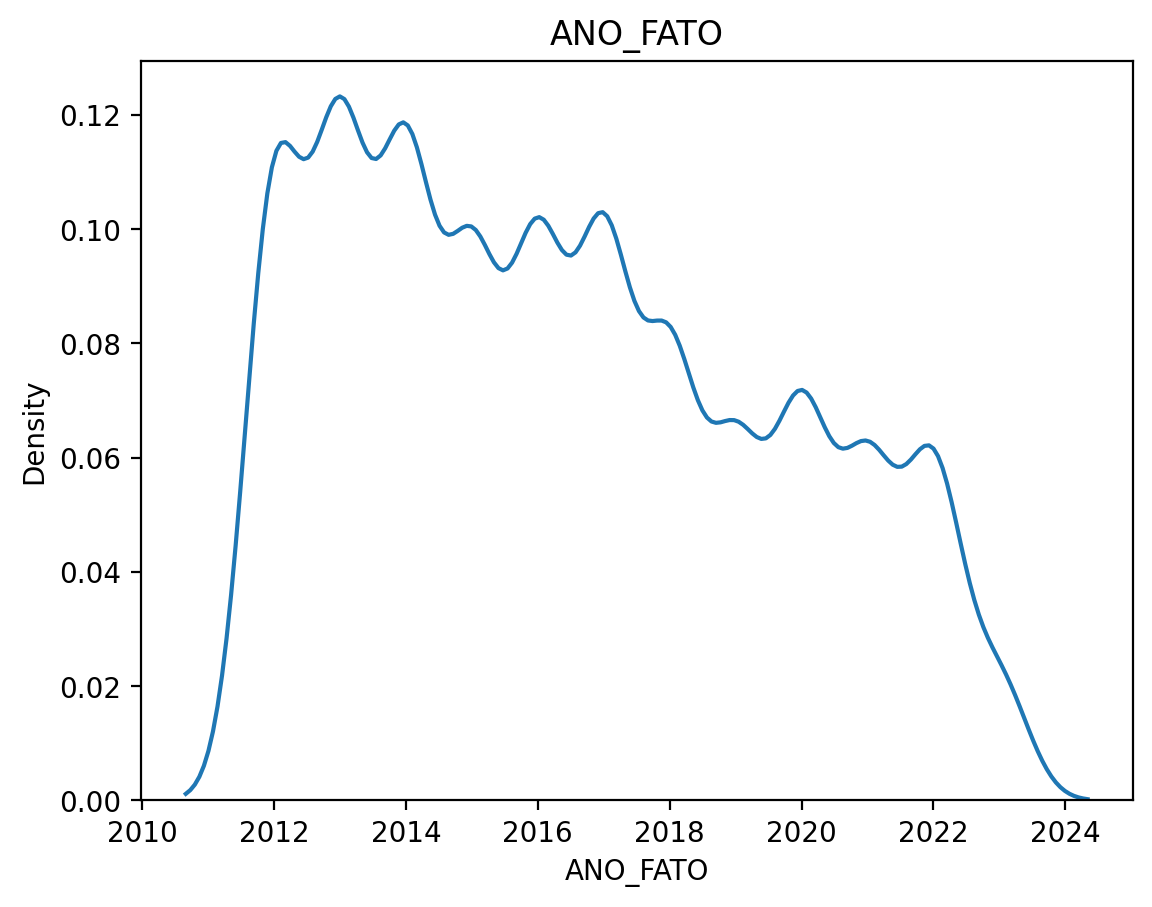

In [180]:
srn.kdeplot(dataset["ANO_FATO"]).set_title("ANO_FATO")

#### MES_FATO


In [181]:
dataset["MES_FATO"].describe()

count    19124.000000
mean         6.290734
std          3.565770
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: MES_FATO, dtype: float64

Text(0.5, 1.0, 'MES_FATO')

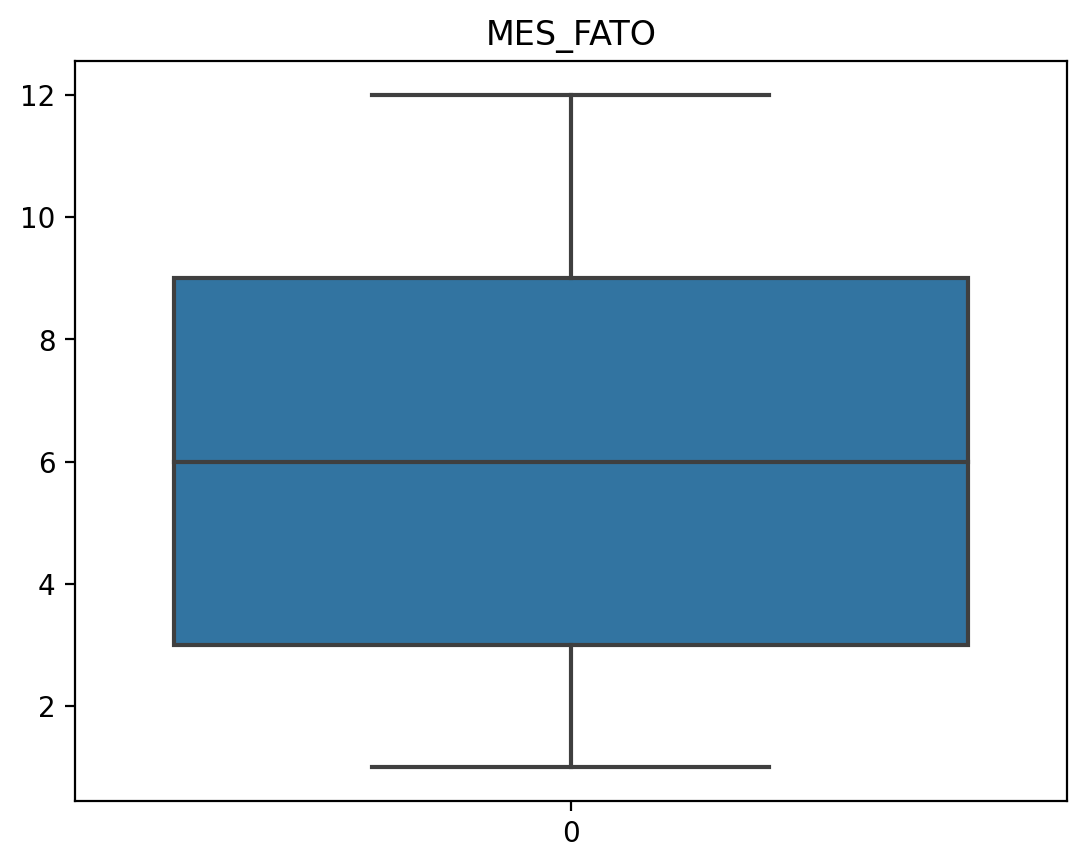

In [182]:
srn.boxplot(dataset["MES_FATO"]).set_title("MES_FATO")

Text(0.5, 1.0, 'MES_FATO')

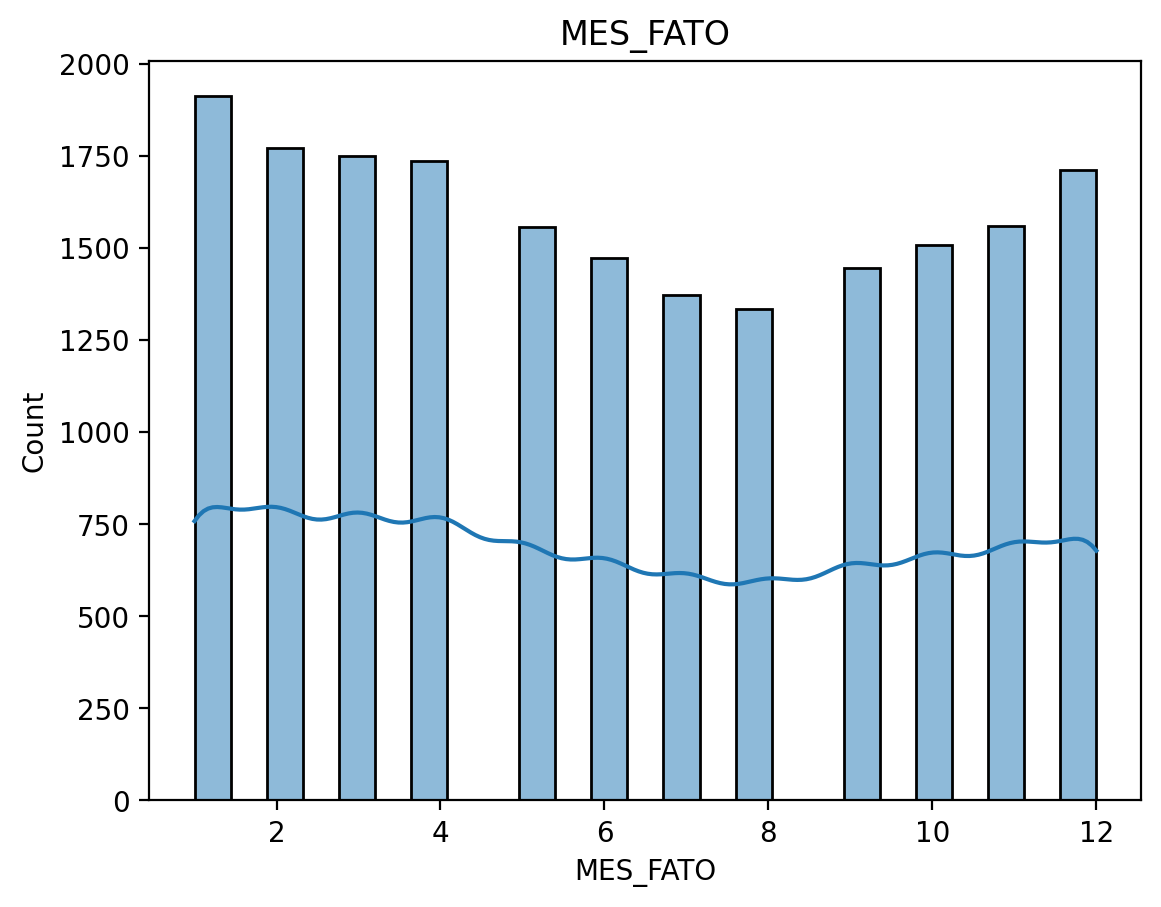

In [183]:
srn.histplot(dataset["MES_FATO"], kde=True).set_title("MES_FATO")

Text(0.5, 1.0, 'MES_FATO')

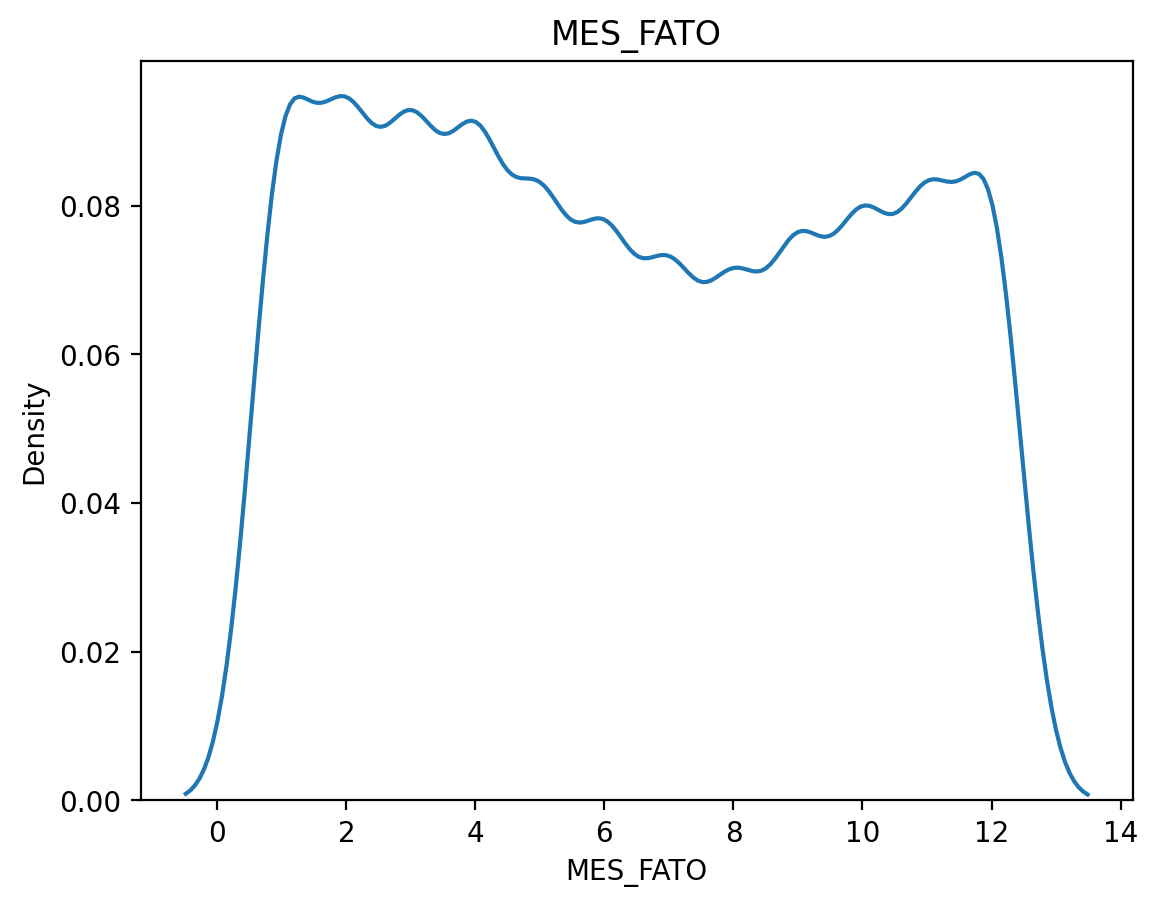

In [184]:
srn.kdeplot(dataset["MES_FATO"]).set_title("MES_FATO")

#### HORA_FATO


In [185]:
dataset["HORA_FATO"].describe()

count    19124.000000
mean        13.862320
std          6.958895
min          0.000000
25%          8.000000
50%         16.000000
75%         20.000000
max         23.000000
Name: HORA_FATO, dtype: float64

Text(0.5, 1.0, 'HORA_FATO')

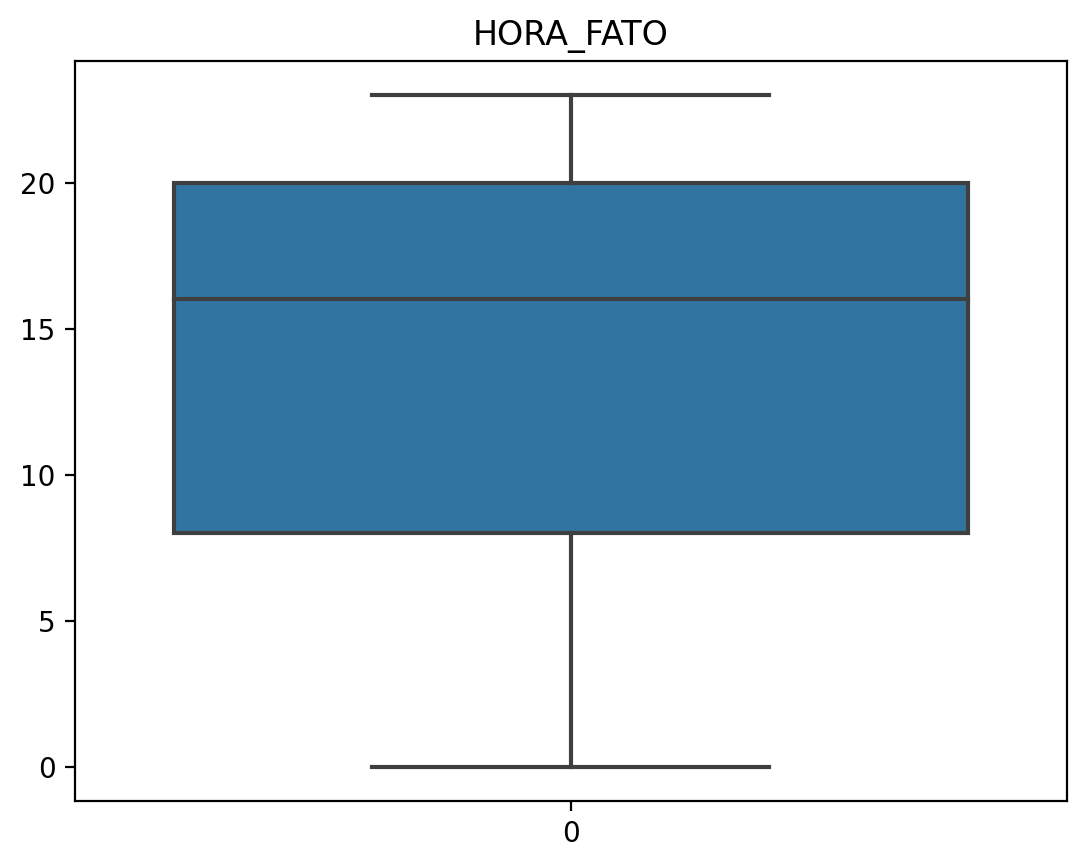

In [186]:
srn.boxplot(dataset["HORA_FATO"]).set_title("HORA_FATO")

Text(0.5, 1.0, 'HORA_FATO')

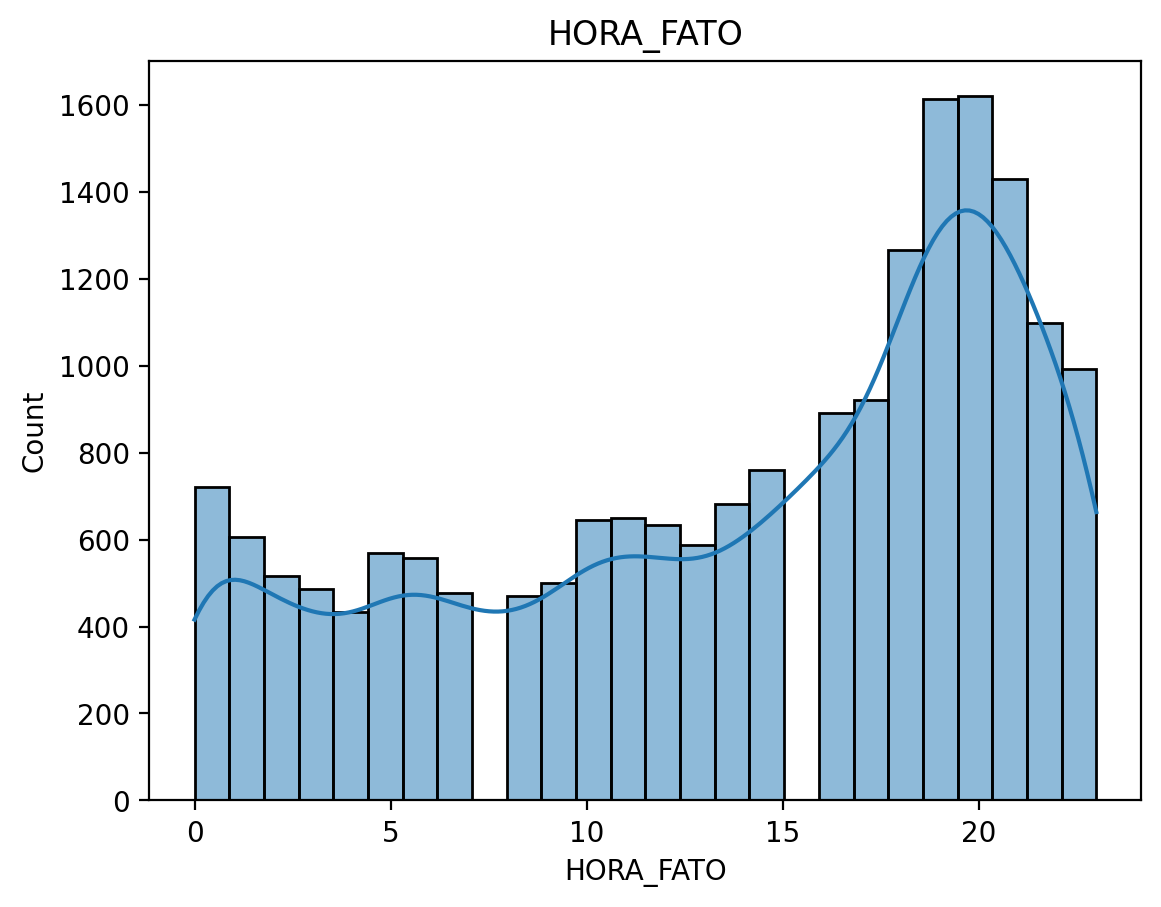

In [187]:
srn.histplot(dataset["HORA_FATO"], kde=True).set_title("HORA_FATO")

Text(0.5, 1.0, 'HORA_FATO')

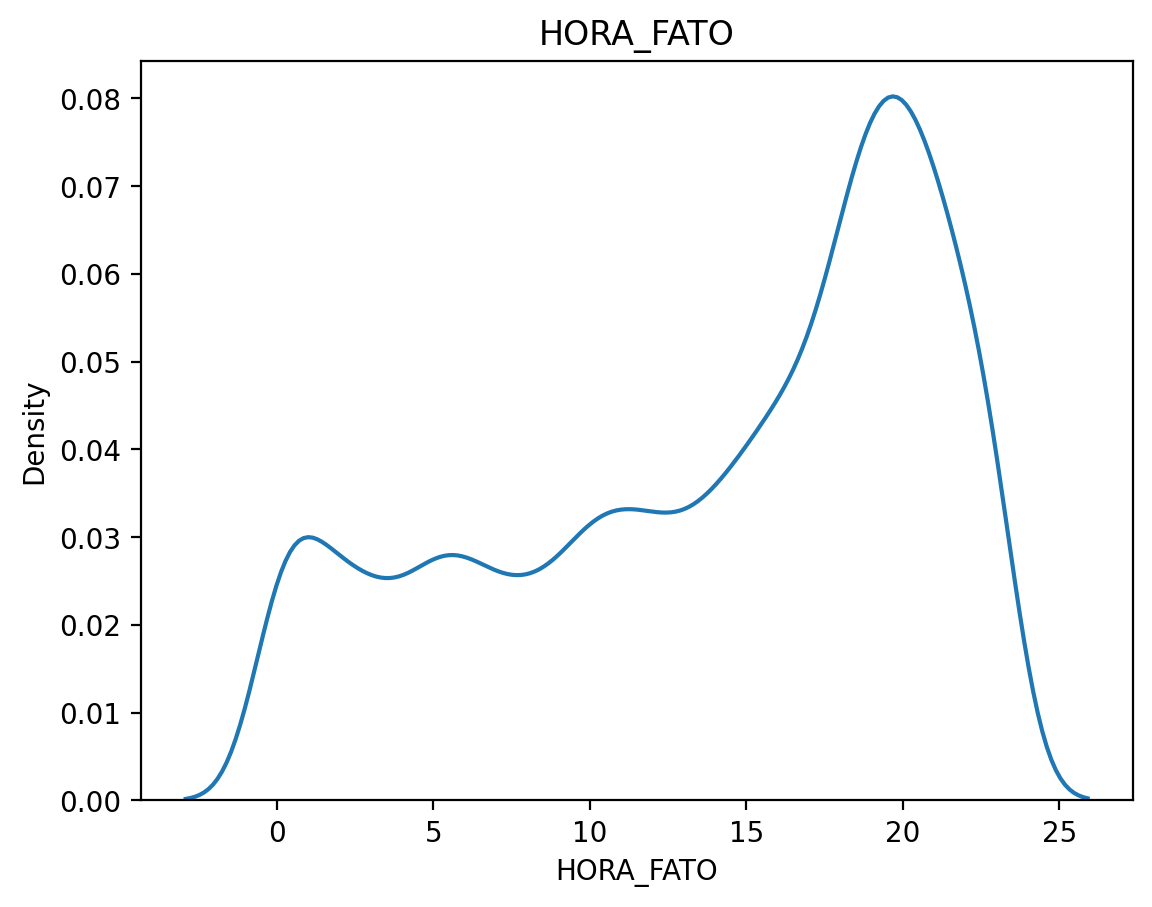

In [188]:
srn.kdeplot(dataset["HORA_FATO"]).set_title("HORA_FATO")

#### DIA_SEMANA_FATO_NUM


In [189]:
dataset["DIA_SEMANA_FATO_NUM"].describe()

count    19124.000000
mean         3.945880
std          2.150254
min          1.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          7.000000
Name: DIA_SEMANA_FATO_NUM, dtype: float64

Text(0.5, 1.0, 'DIA_SEMANA_FATO_NUM ')

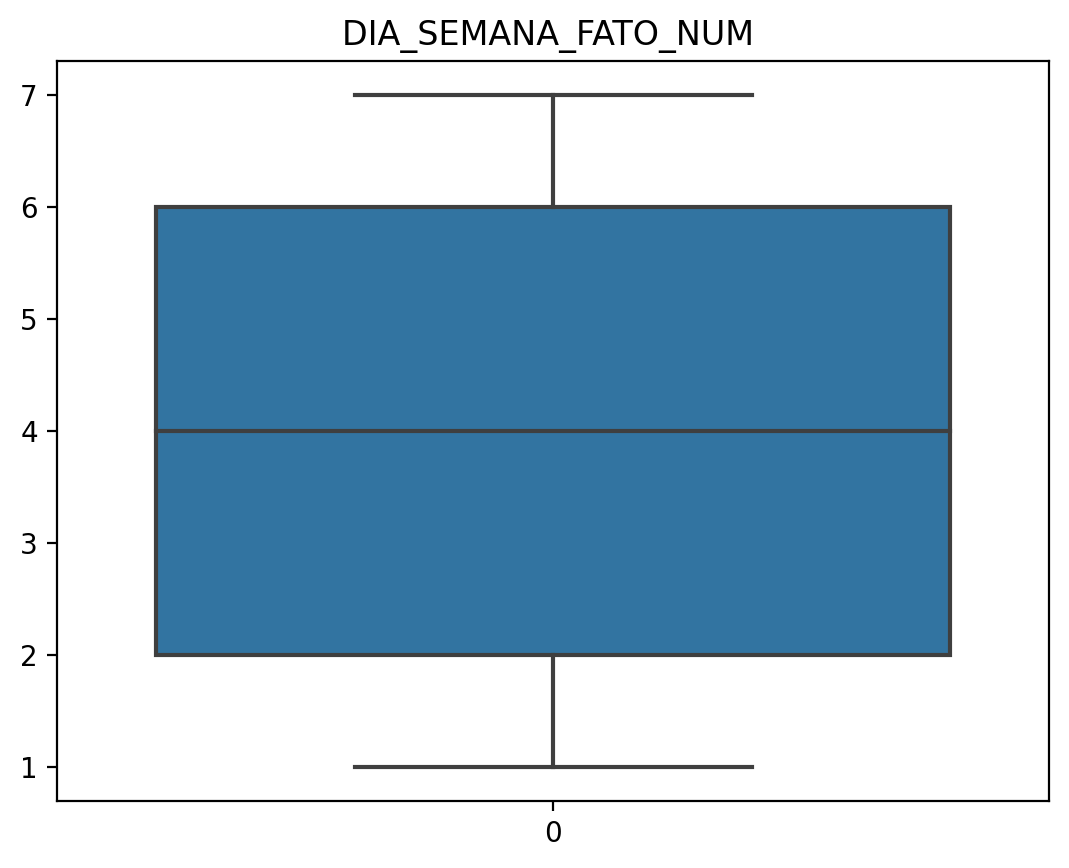

In [190]:
srn.boxplot(dataset["DIA_SEMANA_FATO_NUM"]).set_title("DIA_SEMANA_FATO_NUM ")

Text(0.5, 1.0, 'DIA_SEMANA_FATO_NUM ')

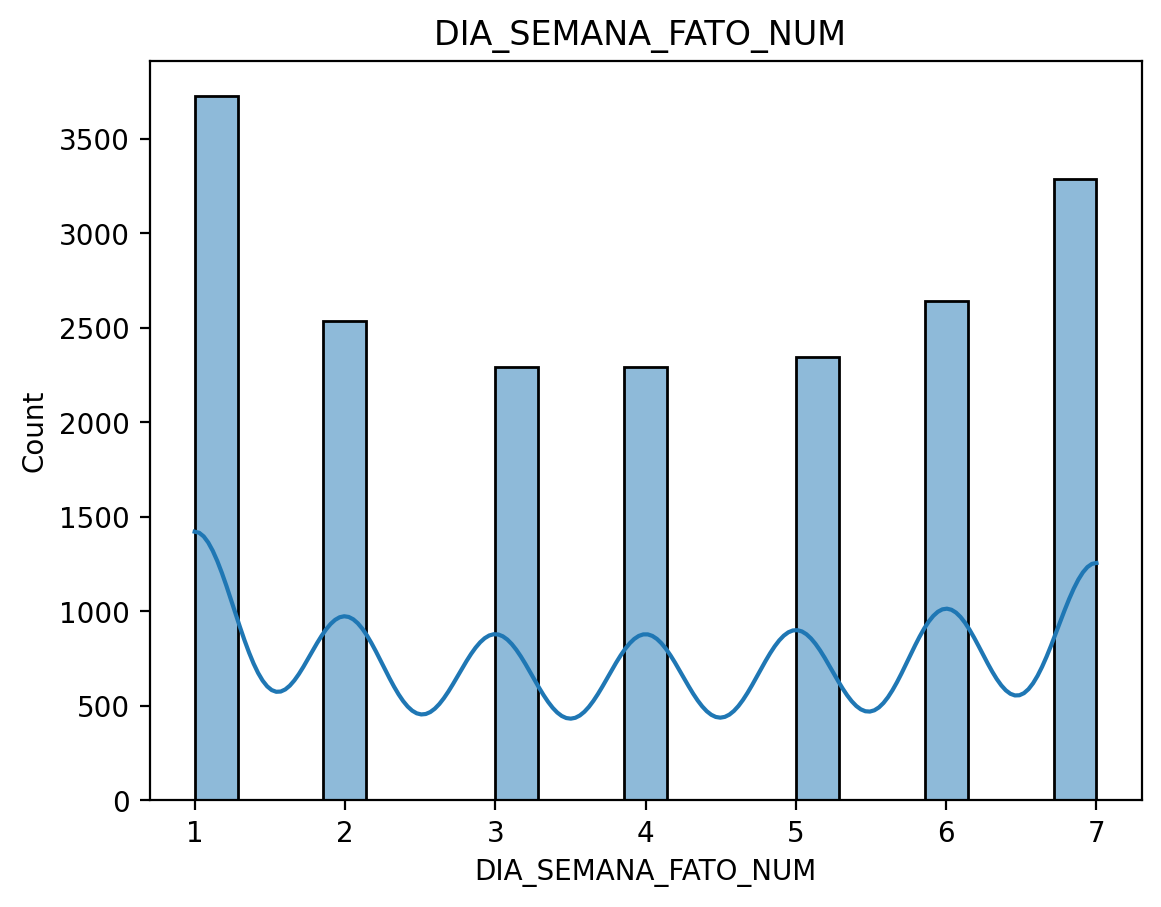

In [191]:
srn.histplot(dataset["DIA_SEMANA_FATO_NUM"], kde=True).set_title("DIA_SEMANA_FATO_NUM ")

Text(0.5, 1.0, 'DIA_SEMANA_FATO_NUM')

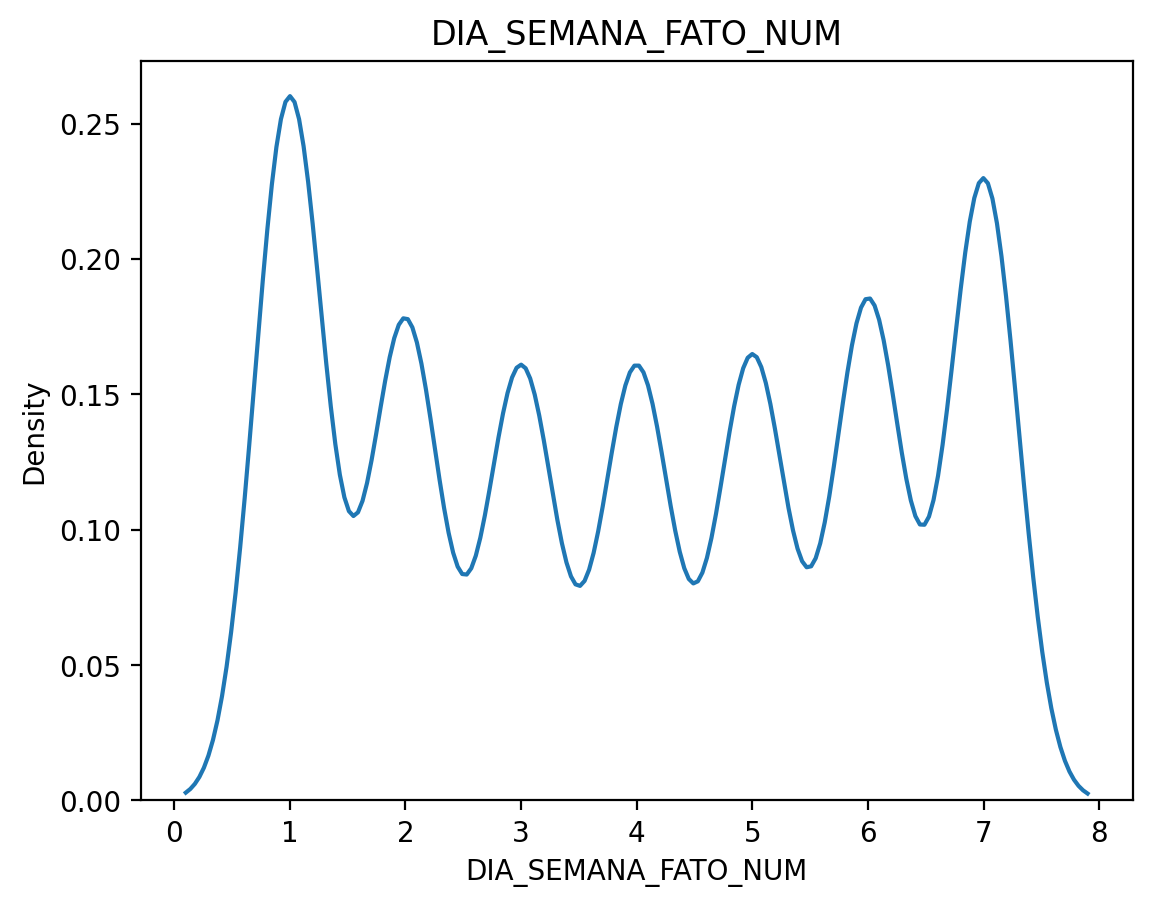

In [192]:
srn.kdeplot(dataset["DIA_SEMANA_FATO_NUM"]).set_title("DIA_SEMANA_FATO_NUM")

#### IDADE_VITIMA


In [193]:
dataset["IDADE_VITIMA"].describe()

count    18702.000000
mean        29.160464
std         12.958349
min          0.000000
25%         20.000000
50%         26.000000
75%         35.000000
max        150.000000
Name: IDADE_VITIMA, dtype: float64

Text(0.5, 1.0, 'IDADE_VITIMA')

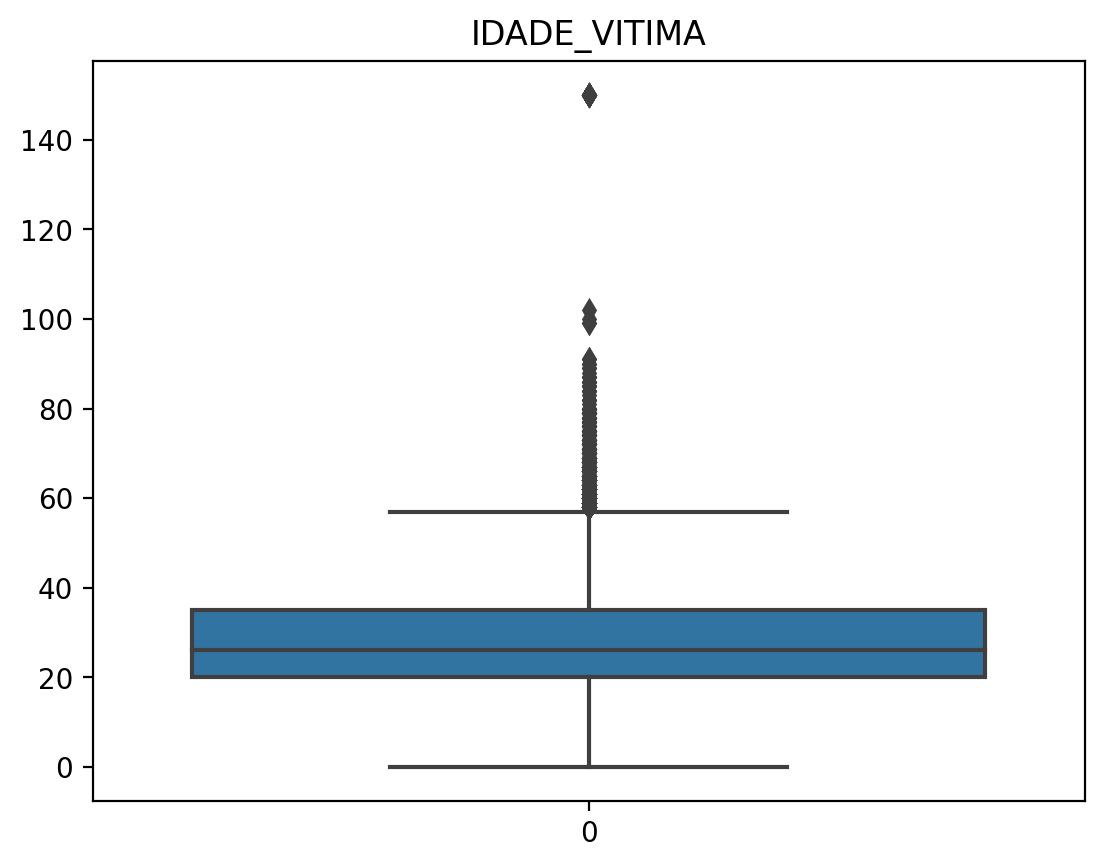

In [194]:
srn.boxplot(dataset["IDADE_VITIMA"]).set_title("IDADE_VITIMA")

Text(0.5, 1.0, 'IDADE_VITIMA')

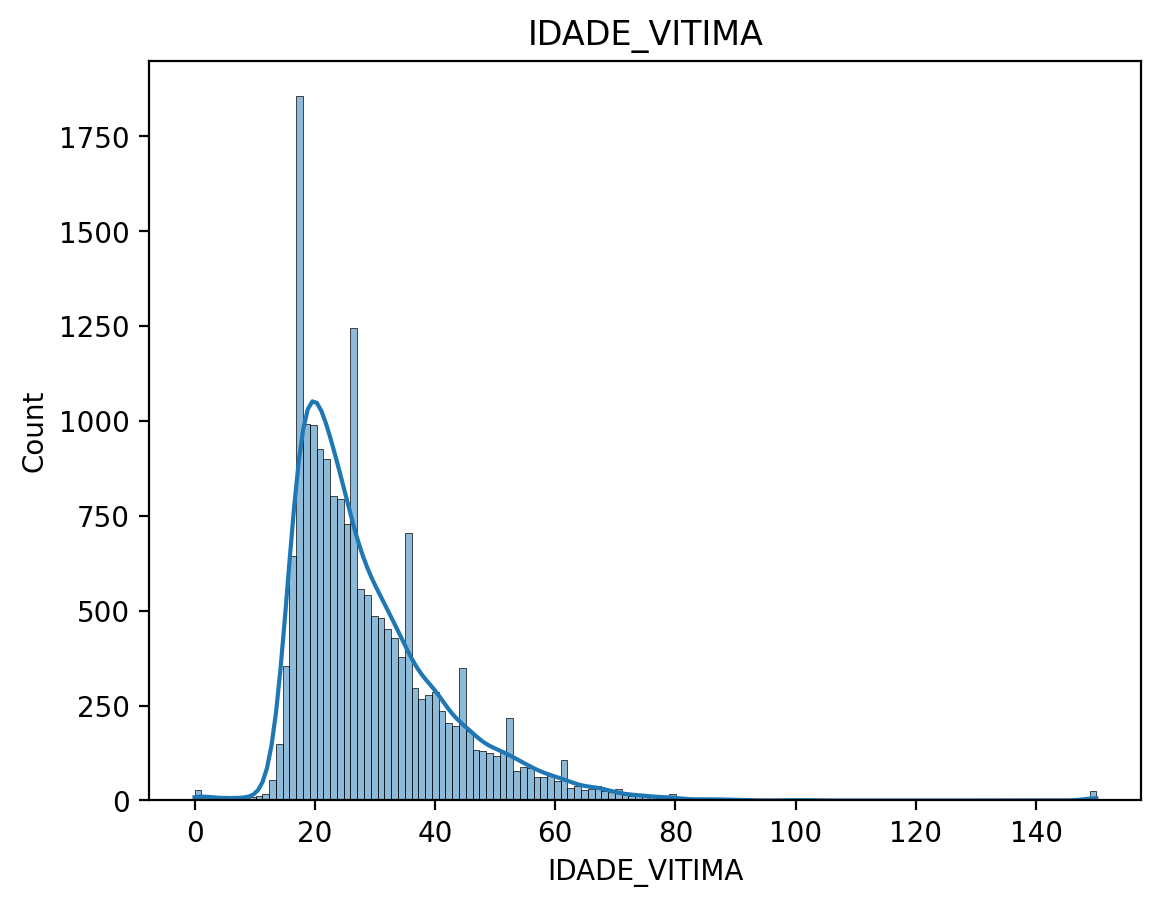

In [195]:
srn.histplot(dataset["IDADE_VITIMA"], kde=True).set_title("IDADE_VITIMA")

Text(0.5, 1.0, 'IDADE_VITIMA')

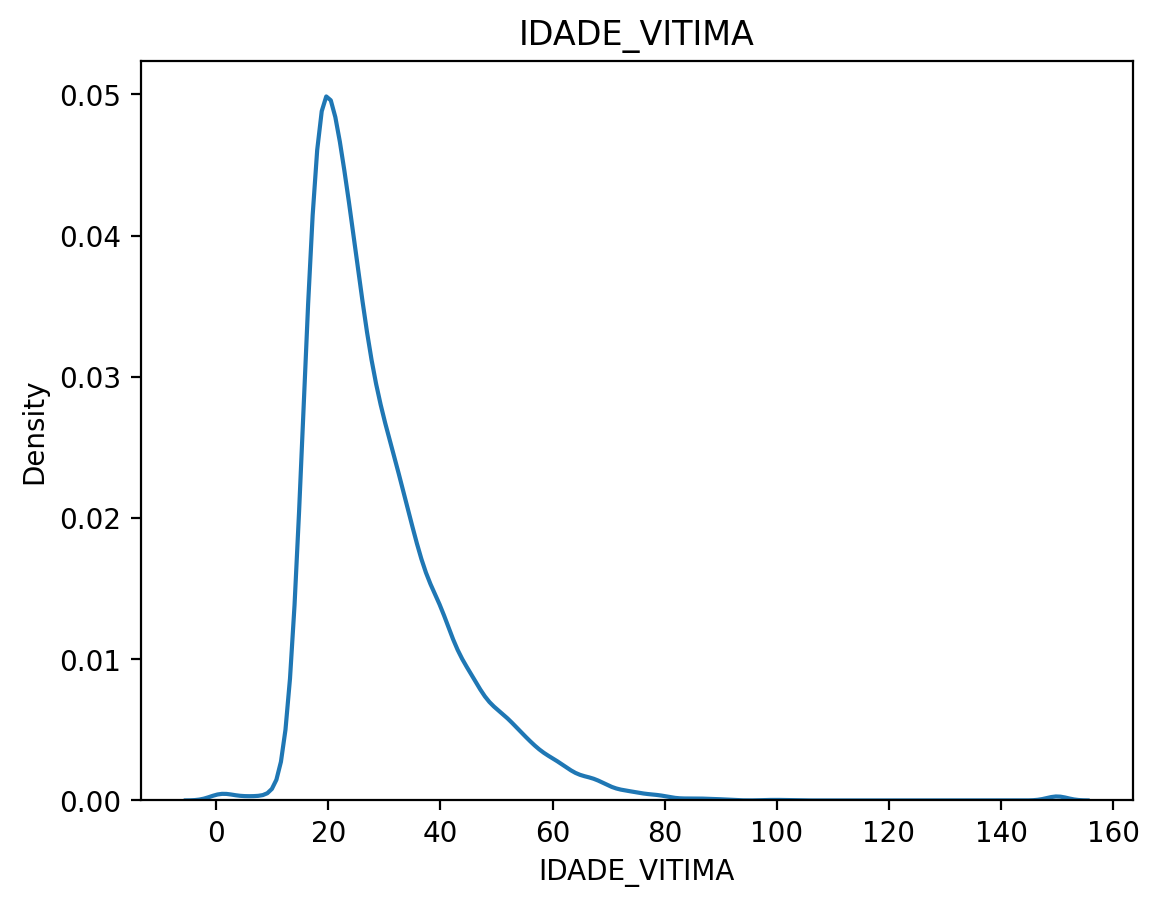

In [196]:
srn.kdeplot(dataset["IDADE_VITIMA"]).set_title("IDADE_VITIMA")

In [197]:
dataset

OBJECTID     ID      NIC SUBJETIVIDADE SUBJETIVIDADE_COMPLEMENTAR  \
0            14     26      NaN          CVLI                  Homicídio   
1           498     27      NaN          CVLI                  Homicídio   
2           137     28      NaN          CVLI                  Homicídio   
3           380     30      NaN          CVLI                  Homicídio   
4           429     29      NaN          CVLI                  Homicídio   
...         ...    ...      ...           ...                        ...   
19119    219627  53068  39710.0          CVLI                  Homicídio   
19120    219759  53072      NaN          CVLI                  Homicídio   
19121    219760  53073      NaN          CVLI                  Homicídio   
19122    219765  53078      NaN          CVLI                  Homicídio   
19123    219770  53083      NaN          CVLI                  Homicídio   

      INSTRUMENTO_UTILIZADO     DATA_HORA_FATO  ANO_FATO  MES_FATO  \
0              ESPANCAMENTO  1/1/2012 01:00:00      2012         1   
1                    BRANCA  1/1/2012 02:45:00      2012         1   
2                       PAF  1/1/2012 03:00:00      2012         1   
3                       PAF  1/1/2012 05:00:00      2012         1   
4                       PAF  1/1/2012 05:00:00      2012         1   
...                     ...                ...       ...       ...   
19119                   PAF  7/5/2023 02:00:00      2023         5   
19120                   PAF  7/5/2023 04:00:00      2023         5   
19121                BRANCA  7/5/2023 07:33:00      2023         5   
19122                   PAF  7/5/2023 14:06:00      2023         5   
19123                   PAF  7/5/2023 21:35:00      2023         5   

      MES_FATO_TEXTO  ...  OCUPACAO_VITIMA ESCOLARIDADE_VITIMA  \
0                Jan  ...       Agricultor        Alfabetizado   
1                Jan  ...        Estudante         Fundamental   
2                Jan  ...      Comerciante               Médio   
3                Jan  ...       Agricultor         Fundamental   
4                Jan  ...       Agricultor        Alfabetizado   
...              ...  ...              ...                 ...   
19119            Mai  ...              NaN                 NaN   
19120            Mai  ...              NaN                 NaN   
19121            Mai  ...              NaN                 NaN   
19122            Mai  ...              NaN                 NaN   
19123            Mai  ...              NaN                 NaN   

       ESTADO_CIVIL_VITIMA AFINIDADE_AGRESSOR  \
0                   Casado                NaN   
1                 Solteiro                NaN   
2                 Solteiro                NaN   
3                   Casado                NaN   
4                   Casado                NaN   
...                    ...                ...   
19119             Solteiro                NaN   
19120                  NaN                NaN   
19121                  NaN                NaN   
19122                  NaN                NaN   
19123                  NaN                NaN   

                                               LINK_SITE SITUACAO_ESPECIAL  \
0                                                    NaN               NaN   
1                                                    NaN               NaN   
2      http://g1.globo.com/al/alagoas/noticia/2016/11...               NaN   
3                                                    NaN               NaN   
4                                                    NaN               NaN   
...                                                  ...               ...   
19119                                                NaN               NaN   
19120                                                NaN               NaN   
19121                                                NaN               NaN   
19122  https://www.jaenoticia.com.br/noticias/2023/05...               NaN   
19123        

## 3. Tratamento dos dados


In [198]:
dataset.isnull().sum()

OBJECTID                          0
ID                                0
NIC                             696
SUBJETIVIDADE                     0
SUBJETIVIDADE_COMPLEMENTAR        0
INSTRUMENTO_UTILIZADO             0
DATA_HORA_FATO                    0
ANO_FATO                          0
MES_FATO                          0
MES_FATO_TEXTO                    0
DIA_FATO                          0
DIA_SEMANA_FATO                   0
HORA_FATO                         0
TURNO                             0
CIDADE_FATO                       0
BAIRRO_FATO                       0
RISP                              0
AISP                              0
ENDERECO_FATO                   207
PT_REF_FATO                   11996
LOCAL_FATO                       81
NOME_VITIMA                       0
ALCUNHA_VITIMA                13107
MAE_VITIMA                     1055
IDADE_VITIMA                    422
COR_RACA_VITIMA                   0
SEXO_VITIMA                       0
OCUPACAO_VITIMA             

In [199]:
dataset.columns

Index(['OBJECTID', 'ID', 'NIC', 'SUBJETIVIDADE', 'SUBJETIVIDADE_COMPLEMENTAR',
       'INSTRUMENTO_UTILIZADO', 'DATA_HORA_FATO', 'ANO_FATO', 'MES_FATO',
       'MES_FATO_TEXTO', 'DIA_FATO', 'DIA_SEMANA_FATO', 'HORA_FATO', 'TURNO',
       'CIDADE_FATO', 'BAIRRO_FATO', 'RISP', 'AISP', 'ENDERECO_FATO',
       'PT_REF_FATO', 'LOCAL_FATO', 'NOME_VITIMA', 'ALCUNHA_VITIMA',
       'MAE_VITIMA', 'IDADE_VITIMA', 'COR_RACA_VITIMA', 'SEXO_VITIMA',
       'OCUPACAO_VITIMA', 'ESCOLARIDADE_VITIMA', 'ESTADO_CIVIL_VITIMA',
       'AFINIDADE_AGRESSOR', 'LINK_SITE', 'SITUACAO_ESPECIAL', 'LONGITUDE',
       'LATITUDE', 'FORMATO', 'DIA_SEMANA_FATO_NUM'],
      dtype='object')

### Campos categórico - tratamento de dados


In [200]:
categoricos = [
    "SUBJETIVIDADE",
    "SUBJETIVIDADE_COMPLEMENTAR",
    "INSTRUMENTO_UTILIZADO",
    "CIDADE_FATO",
    "CIDADE_FATO",
    "BAIRRO_FATO",
    "ENDERECO_FATO",
    "PT_REF_FATO",
    "LOCAL_FATO",
    "NOME_VITIMA",
    "ALCUNHA_VITIMA",
    "MAE_VITIMA",
    "IDADE_VITIMA",
    "COR_RACA_VITIMA",
    "SEXO_VITIMA",
    "OCUPACAO_VITIMA",
    "ESCOLARIDADE_VITIMA",
    "ESTADO_CIVIL_VITIMA",
    "AFINIDADE_AGRESSOR",
    "LINK_SITE",
    "SITUACAO_ESPECIAL",
    "FORMATO",
    "DIA_SEMANA_FATO_NUM",
]

#### Um loop para colocar todos os NaN como NI nos dados Categóricos


In [201]:
# for categ in categoricos:
#     dataset[categ].fillna("NI", inplace=True)

for categ in categoricos:
    if dataset[categ].isnull().sum() > 0:
        print(categ + " con valores NaN => " + str(dataset[categ].isnull().sum()))
        dataset[categ].fillna("NI", inplace=True)

# print("\n Após tranformação con fillna")

# for categ in categoricos:
#     if dataset[categ].isnull().sum() == 0:
#         print(categ + " con valores NaN => " + str(dataset[categ].isnull().sum()))

ENDERECO_FATO con valores NaN => 207
PT_REF_FATO con valores NaN => 11996
LOCAL_FATO con valores NaN => 81
ALCUNHA_VITIMA con valores NaN => 13107
MAE_VITIMA con valores NaN => 1055
IDADE_VITIMA con valores NaN => 422
OCUPACAO_VITIMA con valores NaN => 12670
ESCOLARIDADE_VITIMA con valores NaN => 7251
ESTADO_CIVIL_VITIMA con valores NaN => 4505
AFINIDADE_AGRESSOR con valores NaN => 18081
LINK_SITE con valores NaN => 7290
SITUACAO_ESPECIAL con valores NaN => 19001
FORMATO con valores NaN => 481


#### Dados Categóricos Especificicos


###### ENDERECO_FATO


In [202]:
# ENDERECO_FATO
agrupado = dataset.groupby(["ENDERECO_FATO"]).size()
agrupado

ENDERECO_FATO
 Rua Professor José C. Viana, Várzea da Cohab, próximo a Ponte do mata-quatro          1
 Rua Santa Luzia, próximo a feirinha, porta da Paper.net                               1
 Rua São Vicente                                                                       1
 Rua Tancredo Neves cruzamento com a Rua Maria Pureza, Colégio São José                1
 Sítio Bela Vista, Goiabeiras, estrada de barro que liga o Bebedouro a Fernão Velho    1
                                                                                      ..
Área de Canavial                                                                       3
Área de Mata Atlântica                                                                 1
Área de Mata Fechada                                                                   1
Área de plantio da Antiga Usina Utinga Leão                                            1
Última rua das Casas Novas                                                             1
Length:

In [203]:
dataset["ENDERECO_FATO"].fillna("NI", inplace=True)

In [204]:
dataset["ENDERECO_FATO"].isnull().sum()

0

###### PT_REF_FATO


In [205]:
agrupado = dataset.groupby(["PT_REF_FATO"]).size()
agrupado

PT_REF_FATO
(coordenada de acordo com o bing maps)                        1
10 Km antes do Povoado                                        1
1ª curva na AL 401, após a antiga fábrica de papel CODEPAL    1
1ª entrada para a Cidade, a esquerda, próximo a BR 316        1
1ª rampa do cais, próximo à UFAL                              1
                                                             ..
Área destinada a venda de temperos                            1
Área do estacionamento do aeroporto em construção             1
Área pertencente a Usina Coruripe                             1
Área verde                                                    3
Última rua do loteamento antes da Rodovia                     1
Length: 5910, dtype: int64

In [206]:
dataset["PT_REF_FATO"].fillna("NI", inplace=True)

In [207]:
dataset["PT_REF_FATO"].isnull().sum()

0

###### LOCAL_FATO


In [208]:
agrupado = dataset.groupby(["LOCAL_FATO"]).size()
agrupado

LOCAL_FATO
Acampamento                                                                                                                                    1
Alojamento                                                                                                                                     4
Açude                                                                                                                                         18
Bar                                                                                                                                          461
Barragem                                                                                                                                       3
                                                                                                                                            ... 
Zona Rural                                                                                                             

In [209]:
dataset["LOCAL_FATO"].fillna("NI", inplace=True)

In [210]:
dataset["LOCAL_FATO"].isnull().sum()

0

###### ALCUNHA_VITIMA


In [211]:
agrupado = dataset.groupby(["ALCUNHA_VITIMA"]).size()
agrupado

ALCUNHA_VITIMA
1.000 Graus                         1
32                                  1
41                                  1
AK-47 ou Terror do Manoel Teles     1
Aba                                 1
                                   ..
Éié                                 1
Élcio                               1
Êta                                 1
Índio                              22
Índio ou Jacaré                     1
Length: 3487, dtype: int64

In [212]:
dataset["ALCUNHA_VITIMA"].fillna("NI", inplace=True)

In [213]:
dataset["ALCUNHA_VITIMA"].isnull().sum()

0

###### OCUPACAO_VITIMA


In [214]:
agrupado = dataset.groupby(["OCUPACAO_VITIMA"]).size()
agrupado

OCUPACAO_VITIMA
0101-E/15-0056     1
15.946             1
Acionista          5
Administrador      3
Advogada           1
                  ..
Vigia de Rua       1
Vigia de rua       1
Vigilante         84
Zelador            1
aUTÔNOMO           1
Length: 281, dtype: int64

In [215]:
dataset["OCUPACAO_VITIMA"].fillna("NI", inplace=True)

In [216]:
dataset["OCUPACAO_VITIMA"].isnull().sum()

0

###### ESCOLARIDADE_VITIMA


In [217]:
agrupado = dataset.groupby(["ESCOLARIDADE_VITIMA"]).size()
agrupado

ESCOLARIDADE_VITIMA
Alfabetizado      707
Analfabeto        527
Fundamental      3163
Médio             668
NI              13968
Superior           91
dtype: int64

In [218]:
dataset["ESCOLARIDADE_VITIMA"].describe()

count     19124
unique        6
top          NI
freq      13968
Name: ESCOLARIDADE_VITIMA, dtype: object

In [219]:
dataset["ESCOLARIDADE_VITIMA"].fillna("NI", inplace=True)

In [220]:
dataset["ESCOLARIDADE_VITIMA"].isnull().sum()

0

###### ESTADO_CIVIL_VITIMA

<!--                   7251
# ESTADO_CIVIL_VITIMA                  4505
# AFINIDADE_AGRESSOR                  18081
# LINK_SITE                            7290
# SITUACAO_ESPECIAL                   19001
# LONGITUDE                             483
# LATITUDE                              483
# FORMATO                               481

# Faltam .... -->


In [221]:
agrupado = dataset.groupby(["ESTADO_CIVIL_VITIMA"]).size()
agrupado

ESTADO_CIVIL_VITIMA
Casado            1856
Companheiro        568
Divorciado           9
NI               11959
Separado           237
Solteiro          4395
União Estável       73
Viúvo               27
dtype: int64

In [222]:
dataset["ESTADO_CIVIL_VITIMA"].describe()

count     19124
unique        8
top          NI
freq      11959
Name: ESTADO_CIVIL_VITIMA, dtype: object

In [223]:
dataset["ESTADO_CIVIL_VITIMA"].fillna("NI", inplace=True)

In [224]:
dataset["ESTADO_CIVIL_VITIMA"].isnull().sum()

0

### Campos numéricos - tratamento de dados


In [225]:
numericos = [
    "OBJECTID",
    "ID",
    "NIC",
    "ANO_FATO",
    "MES_FATO",
    "DIA_FATO",
    "DIA_SEMANA_FATO",
    "HORA_FATO",
    "IDADE_VITIMA",
    "SEXO_VITIMA",
    "LONGITUDE",
    "LATITUDE",
    "FORMATO",
    "DIA_SEMANA_FATO_NUM",
]

#### Um loop para colocar todos os NaN como ediana nos dados Numéricos


In [226]:
# for numer in numericos:
#     dataset[numer].fillna("NI", inplace=True)

# for categ in categoricos:
#     if (dataset[numer].isnull().sum() > 0):
#         print(categ + ' con valores NaN => ' + str(dataset[numer].isnull().sum()) )
#         dataset[numer].fillna("NI", inplace=True)

# print('\n Após tranformação con fillna' )
# for categ in categoricos:
#     if (dataset[numer].isnull().sum() == 0):

#         print(numer + ' con valores NaN => ' + str(dataset[numer].isnull().sum()) )
# dataset.fillna({"NIC": dataset.NIC.mean()}, inplace=True)
# dataset.fillna({"IDADE_VITIMA": dataset.IDADE_VITIMA.mean()}, inplace=True)

#### Numéricos especifícos


##### NIC


In [227]:
dataset["NIC"].describe()

count     18428.000000
mean      20200.817994
std       13150.282753
min           0.000000
25%       10034.500000
50%       19662.500000
75%       29776.250000
max      693089.000000
Name: NIC, dtype: float64

In [228]:
dataset["NIC"].isnull().sum()

696

##### IDADE_VITIMA


In [229]:
dataset["IDADE_VITIMA"].describe()

count     19124.0
unique       97.0
top          19.0
freq        993.0
Name: IDADE_VITIMA, dtype: float64

In [230]:
# dataset.loc[(dataset["IDADE_VITIMA"] < 0) | (dataset["IDADE_VITIMA"] > 120)]

In [231]:
# calcular a mediana
# dataset.fillna({"IDADE_VITIMA": dataset.IDADE_VITIMA.mean()}, inplace=True)
# mediana = sts.median(dataset["IDADE_VITIMA"])
# mediana

In [232]:
# # dataset.fillna({"IDADE_VITIMA": dataset.IDADE_VITIMA.mean()}, inplace=True)
# dataset.loc[
#     (dataset["IDADE_VITIMA"] < 0) | (dataset["IDADE_VITIMA"] > 120), "IDADE_VITIMA"
# ] = mediana

In [233]:
dataset["IDADE_VITIMA"].isnull().sum()

0

In [234]:
dataset["IDADE_VITIMA"].describe()

count     19124.0
unique       97.0
top          19.0
freq        993.0
Name: IDADE_VITIMA, dtype: float64

In [235]:
dataset

OBJECTID     ID      NIC SUBJETIVIDADE SUBJETIVIDADE_COMPLEMENTAR  \
0            14     26      NaN          CVLI                  Homicídio   
1           498     27      NaN          CVLI                  Homicídio   
2           137     28      NaN          CVLI                  Homicídio   
3           380     30      NaN          CVLI                  Homicídio   
4           429     29      NaN          CVLI                  Homicídio   
...         ...    ...      ...           ...                        ...   
19119    219627  53068  39710.0          CVLI                  Homicídio   
19120    219759  53072      NaN          CVLI                  Homicídio   
19121    219760  53073      NaN          CVLI                  Homicídio   
19122    219765  53078      NaN          CVLI                  Homicídio   
19123    219770  53083      NaN          CVLI                  Homicídio   

      INSTRUMENTO_UTILIZADO     DATA_HORA_FATO  ANO_FATO  MES_FATO  \
0              ESPANCAMENTO  1/1/2012 01:00:00      2012         1   
1                    BRANCA  1/1/2012 02:45:00      2012         1   
2                       PAF  1/1/2012 03:00:00      2012         1   
3                       PAF  1/1/2012 05:00:00      2012         1   
4                       PAF  1/1/2012 05:00:00      2012         1   
...                     ...                ...       ...       ...   
19119                   PAF  7/5/2023 02:00:00      2023         5   
19120                   PAF  7/5/2023 04:00:00      2023         5   
19121                BRANCA  7/5/2023 07:33:00      2023         5   
19122                   PAF  7/5/2023 14:06:00      2023         5   
19123                   PAF  7/5/2023 21:35:00      2023         5   

      MES_FATO_TEXTO  ...  OCUPACAO_VITIMA ESCOLARIDADE_VITIMA  \
0                Jan  ...       Agricultor        Alfabetizado   
1                Jan  ...        Estudante         Fundamental   
2                Jan  ...      Comerciante               Médio   
3                Jan  ...       Agricultor         Fundamental   
4                Jan  ...       Agricultor        Alfabetizado   
...              ...  ...              ...                 ...   
19119            Mai  ...               NI                  NI   
19120            Mai  ...               NI                  NI   
19121            Mai  ...               NI                  NI   
19122            Mai  ...               NI                  NI   
19123            Mai  ...               NI                  NI   

       ESTADO_CIVIL_VITIMA AFINIDADE_AGRESSOR  \
0                   Casado                 NI   
1                 Solteiro                 NI   
2                 Solteiro                 NI   
3                   Casado                 NI   
4                   Casado                 NI   
...                    ...                ...   
19119             Solteiro                 NI   
19120                   NI                 NI   
19121                   NI                 NI   
19122                   NI                 NI   
19123                   NI                 NI   

                                               LINK_SITE SITUACAO_ESPECIAL  \
0                                                     NI                NI   
1                                                     NI                NI   
2      http://g1.globo.com/al/alagoas/noticia/2016/11...                NI   
3                                                     NI                NI   
4                                                     NI                NI   
...                                                  ...               ...   
19119                                                 NI                NI   
19120                                                 NI                NI   
19121                                                 NI                NI   
19122  https://www.jaenoticia.com.br/noticias/2023/05...                NI   
19123        

# III - Treinar os modelos


## 4. Classificadores


In [236]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

random_state = 1234  # get reproducible trees

In [237]:
# Analisar dimensões do dataset
# Fill missing values for Age
dataset.fillna({"NIC": dataset.NIC.mean()}, inplace=True)
# dataset.fillna({"IDADE_VITIMA": dataset.IDADE_VITIMA.mean()}, inplace=True)

# # Encode categorical variables
dataset["SUBJETIVIDADE_label"] = dataset.SUBJETIVIDADE.astype("category").cat.codes
dataset["SUBJETIVIDADE_COMPLEMENTAR_label"] = dataset.SUBJETIVIDADE_COMPLEMENTAR.astype(
    "category"
).cat.codes
dataset["INSTRUMENTO_UTILIZADO_label"] = dataset.INSTRUMENTO_UTILIZADO.astype(
    "category"
).cat.codes
dataset["COR_RACA_VITIMA_label"] = dataset.COR_RACA_VITIMA.astype("category").cat.codes
dataset["CIDADE_FATO_label"] = dataset.CIDADE_FATO.astype("category").cat.codes
dataset["BAIRRO_FATO_label"] = dataset.BAIRRO_FATO.astype("category").cat.codes
dataset["ESCOLARIDADE_VITIMA_label"] = dataset.ESCOLARIDADE_VITIMA.astype(
    "category"
).cat.codes
dataset["LOCAL_FATO_label"] = dataset.LOCAL_FATO.astype("category").cat.codes
dataset["SEXO_VITIMA"] = dataset.SEXO_VITIMA.astype("category").cat.codes

In [238]:
features = [
    "ANO_FATO",
    "MES_FATO",
    "DIA_SEMANA_FATO_NUM",
    "HORA_FATO",
    "SUBJETIVIDADE_label",
    "SUBJETIVIDADE_COMPLEMENTAR_label",
    "INSTRUMENTO_UTILIZADO_label",
    "COR_RACA_VITIMA_label",
    "CIDADE_FATO_label",
    "BAIRRO_FATO_label",
    "ESCOLARIDADE_VITIMA_label",
    "LOCAL_FATO_label",
]
target = "SEXO_VITIMA"

tree_classifier = DecisionTreeClassifier(max_depth=4, random_state=random_state)
# Treinando
tree_classifier.fit(dataset[features].values, dataset[target].values)

DecisionTreeClassifier(max_depth=4, random_state=1234)

In [239]:
dataset

OBJECTID     ID           NIC SUBJETIVIDADE SUBJETIVIDADE_COMPLEMENTAR  \
0            14     26  20200.817994          CVLI                  Homicídio   
1           498     27  20200.817994          CVLI                  Homicídio   
2           137     28  20200.817994          CVLI                  Homicídio   
3           380     30  20200.817994          CVLI                  Homicídio   
4           429     29  20200.817994          CVLI                  Homicídio   
...         ...    ...           ...           ...                        ...   
19119    219627  53068  39710.000000          CVLI                  Homicídio   
19120    219759  53072  20200.817994          CVLI                  Homicídio   
19121    219760  53073  20200.817994          CVLI                  Homicídio   
19122    219765  53078  20200.817994          CVLI                  Homicídio   
19123    219770  53083  20200.817994          CVLI                  Homicídio   

      INSTRUMENTO_UTILIZADO     DATA_HORA_FATO  ANO_FATO  MES_FATO  \
0              ESPANCAMENTO  1/1/2012 01:00:00      2012         1   
1                    BRANCA  1/1/2012 02:45:00      2012         1   
2                       PAF  1/1/2012 03:00:00      2012         1   
3                       PAF  1/1/2012 05:00:00      2012         1   
4                       PAF  1/1/2012 05:00:00      2012         1   
...                     ...                ...       ...       ...   
19119                   PAF  7/5/2023 02:00:00      2023         5   
19120                   PAF  7/5/2023 04:00:00      2023         5   
19121                BRANCA  7/5/2023 07:33:00      2023         5   
19122                   PAF  7/5/2023 14:06:00      2023         5   
19123                   PAF  7/5/2023 21:35:00      2023         5   

      MES_FATO_TEXTO  ...                                            FORMATO  \
0                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-37.353172,-9.164467,-...   
1                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-35.4039,-9.0450000000...   
2                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-36.238403,-9.36336899...   
3                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-37.19284,-9.517126000...   
4                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-37.19284,-9.517126000...   
...              ...  ...                                                ...   
19119            Mai  ...                                                 NI   
19120            Mai  ...                                                 NI   
19121            Mai  ...                                                 NI   
19122            Mai  ...                                                 NI   
19123            Mai  ...                                                 NI   

      DIA_SEMANA_FATO_NUM  SUBJETIVIDADE_label  \
0                       1                    0   
1                       1                    0   
2                       1                    0   
3                       1                    0   
4                       1                    0   
...                   ...                  ...   
19119                   1                    0   
19120                   1                    0   
19121                   1                    0   
19122                   1                    0   
19123                   1                    0   

      SUBJETIVIDADE_COMPLEMENTAR_label INSTRUMENTO_UTILIZADO_label  \
0                                    2                           9   
1                                    2                           6   
2                                    2                          14   
3                                    2                          14   
4                                    2                          14   
...                                ...                         ...   
19119                                2                          14   
19120                                2                          14   
1

### Gráficos 3D


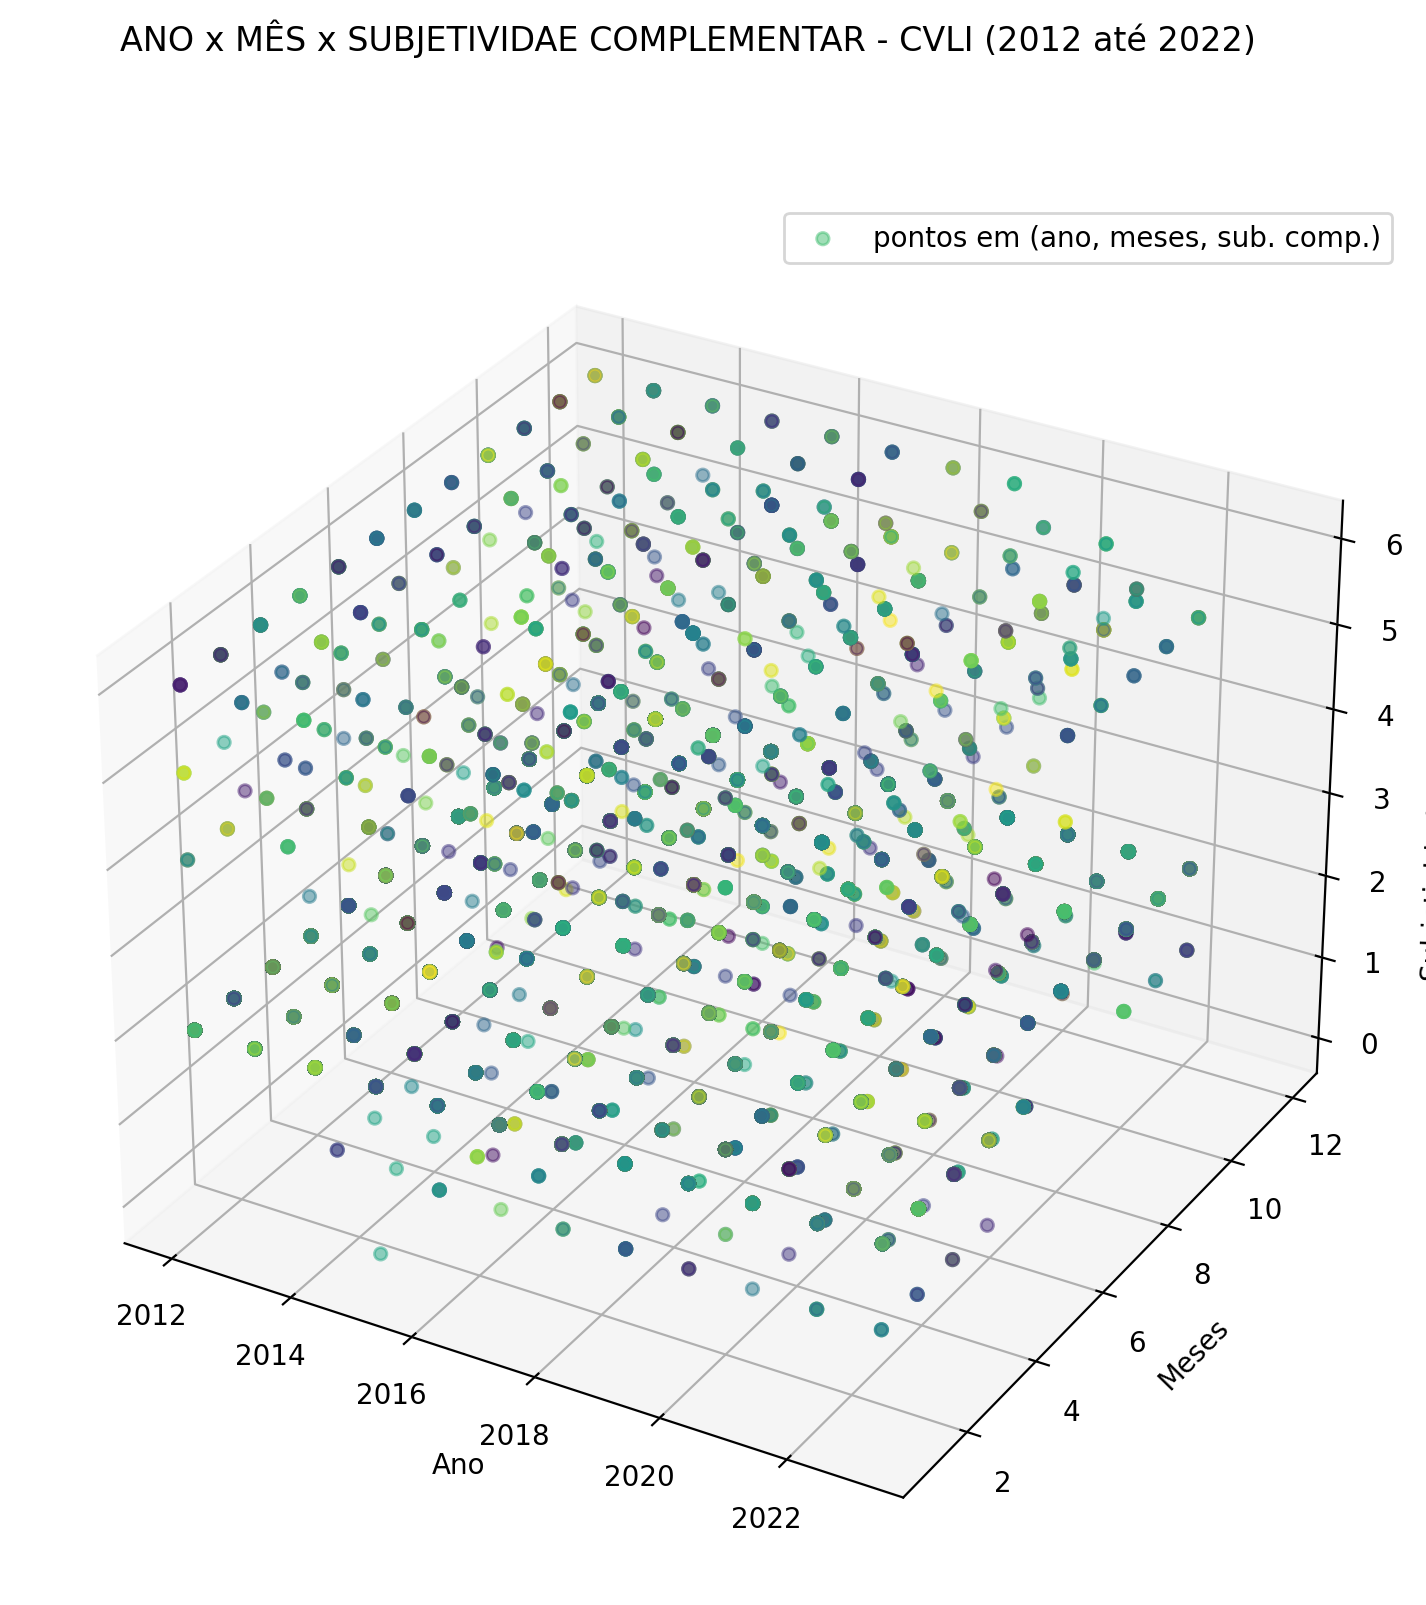

In [307]:
# Criação do gráfico 3D, indicando o atributo projection = '3d' e passando três atributos (decrease, rowpos e colpos)
# colorpalette = srn.color_palette()
N = 19124

colors = np.random.rand(N)

# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(10, 9))
fig.suptitle("ANO x MÊS x SUBJETIVIDAE COMPLEMENTAR - CVLI (2012 até 2022)")

eixo = fig.add_subplot(projection="3d")
eixo.scatter(
    xs=dataset.ANO_FATO,
    ys=dataset.MES_FATO,
    zs=dataset.SUBJETIVIDADE_COMPLEMENTAR_label,
    c=colors,
    alpha=0.5,
    label="pontos em (ano, meses, sub. comp.)",
)

eixo.legend()
eixo.set_xlabel("Ano")
eixo.set_ylabel("Meses")
eixo.set_zlabel("Subjetividade Complementar")

# eixo.view_init(elev=20., azim=-35, roll=0)
plt.show()
# eixo.set_zlabel("Complementar")

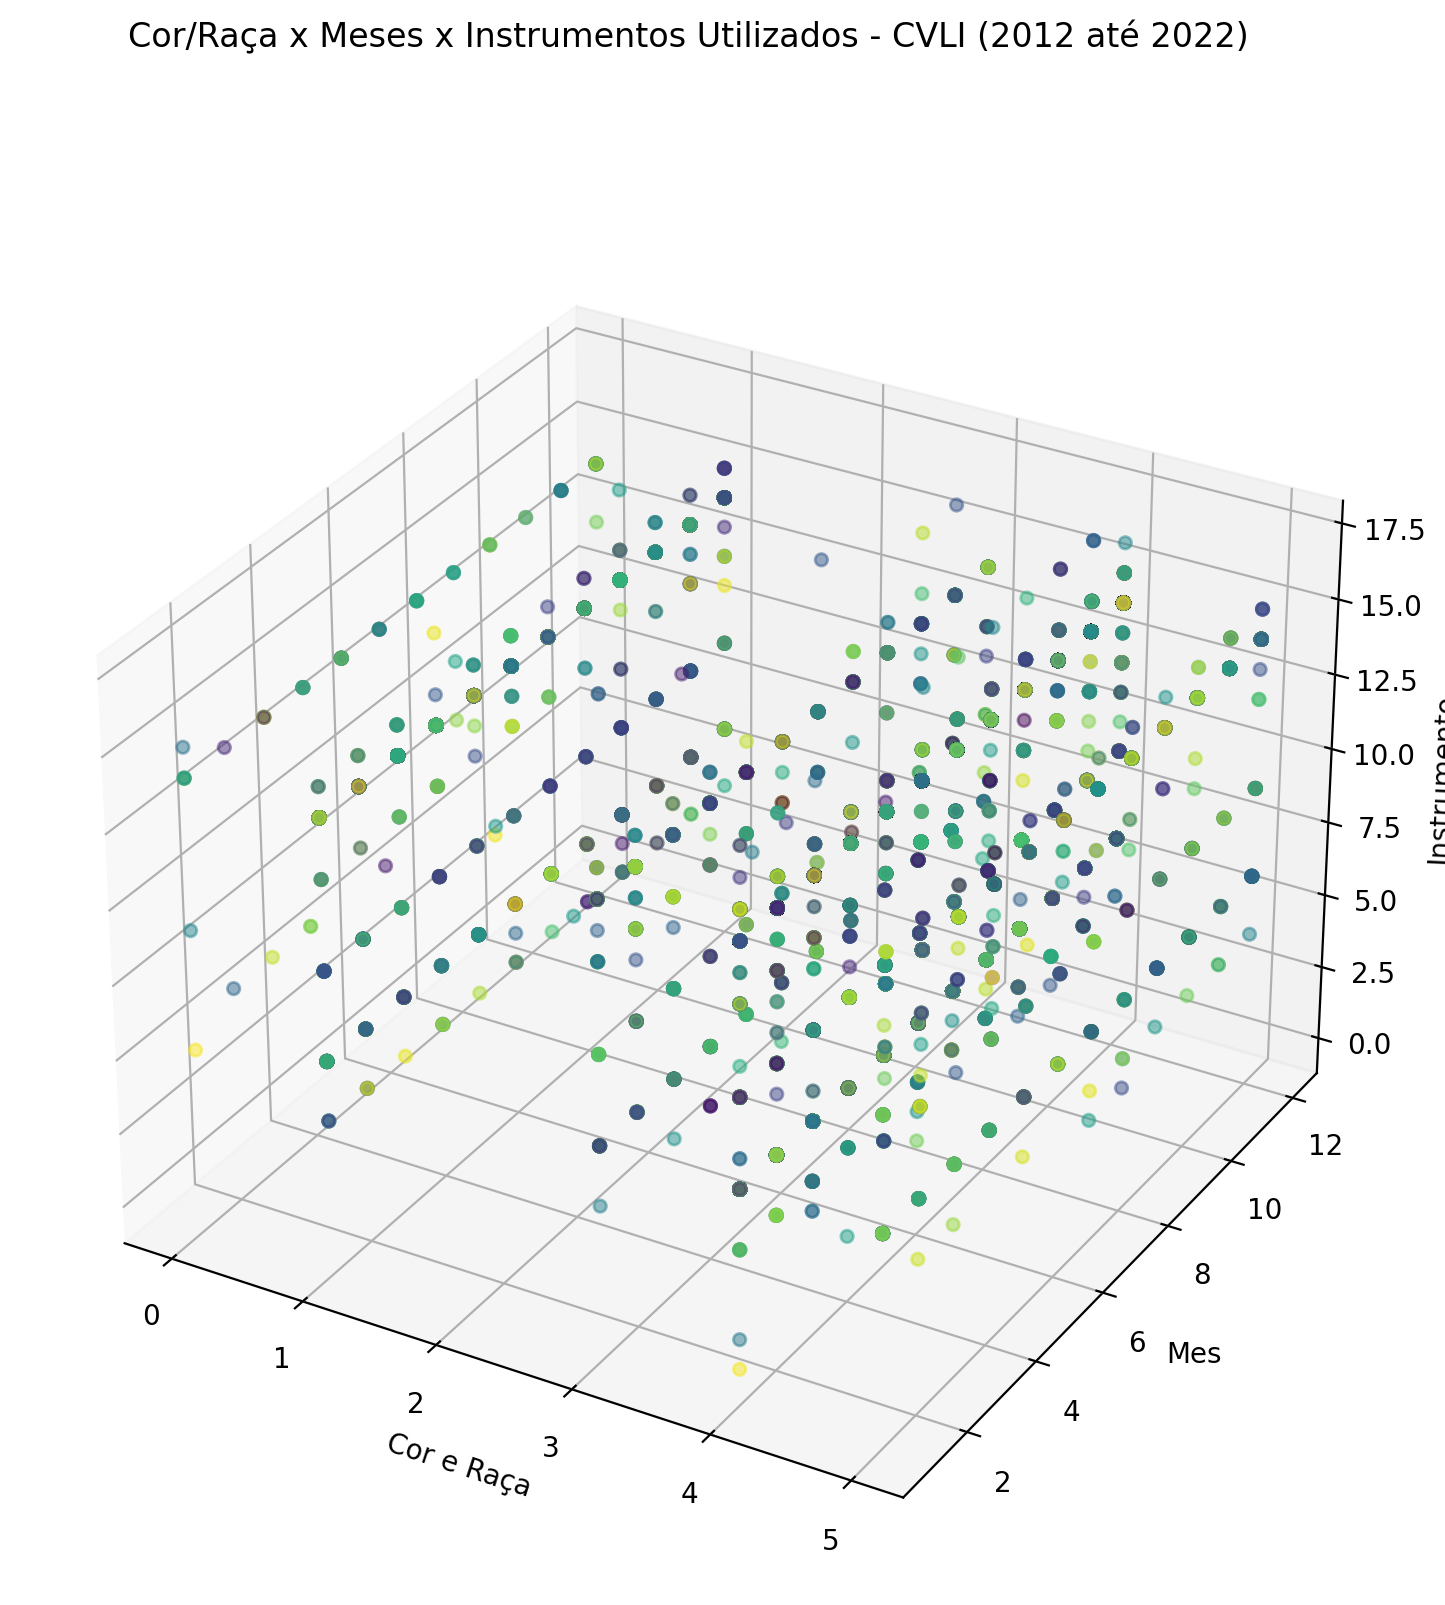

In [310]:
# Criação do gráfico 3D, indicando o atributo projection = '3d' e passando três atributos (decrease, rowpos e colpos)
# colorpalette = srn.color_palette()
N = 19124

colors = np.random.rand(N)

# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
# plt.show()

# Set up a figure twice as tall as it is wide
fig = plt.figure(figsize=(10, 9))
fig.suptitle(r"Cor/Raça x Meses x Instrumentos Utilizados - CVLI (2012 até 2022)")

eixo = fig.add_subplot(projection="3d")
eixo.scatter(
    xs=dataset.COR_RACA_VITIMA_label,
    ys=dataset.MES_FATO,
    zs=dataset.INSTRUMENTO_UTILIZADO_label,
    c=colors,
    alpha=0.5,
    label="pontos em (Cor/Raça, Meses, Inst. Util.)",
)

eixo.set_xlabel("Cor e Raça")
eixo.set_ylabel("Mes")
eixo.set_zlabel("Instrumento")
plt.show()
# eixo.set_zlabel("Complementar")

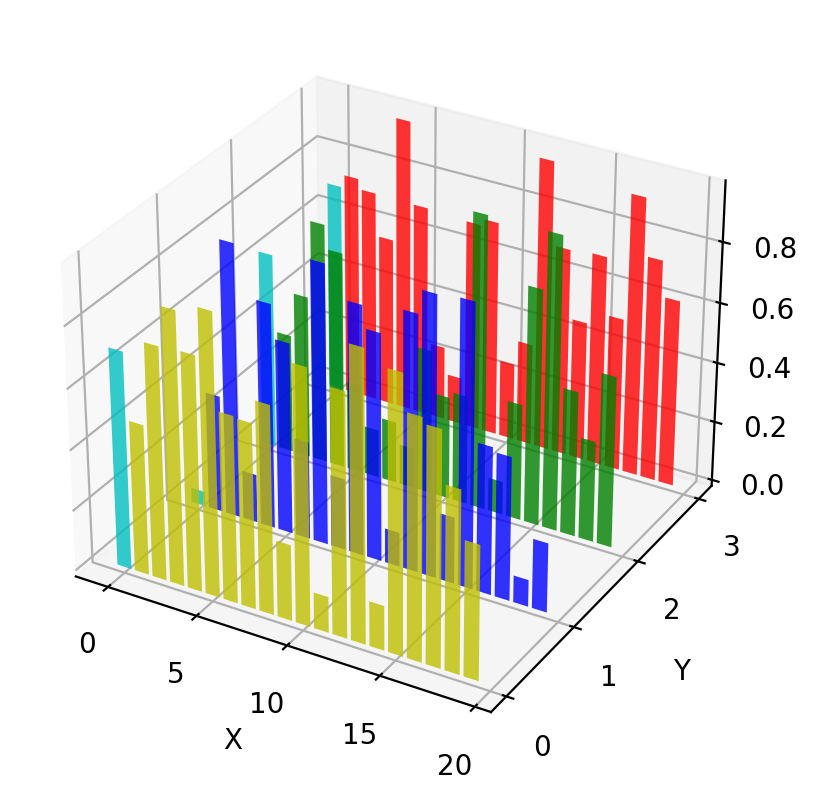

In [242]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure()
ax = fig.add_subplot(projection="3d")

colors = ["r", "g", "b", "y"]
yticks = [3, 2, 1, 0]
for c, k in zip(colors, yticks):
    # Generate the random data for the y=k 'layer'.
    xs = np.arange(20)
    ys = np.random.rand(20)

    # You can provide either a single color or an array with the same length as
    # xs and ys. To demonstrate this, we color the first bar of each set cyan.
    cs = [c] * len(xs)
    cs[0] = "c"

    # Plot the bar graph given by xs and ys on the plane y=k with 80% opacity.
    ax.bar(xs, ys, zs=k, zdir="y", color=cs, alpha=0.8)

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# On the y-axis let's only label the discrete values that we have data for.
ax.set_yticks(yticks)

plt.show()

### Gráfico de Dispersão


<Axes: xlabel='SUBJETIVIDADE_COMPLEMENTAR_label', ylabel='BAIRRO_FATO_label'>

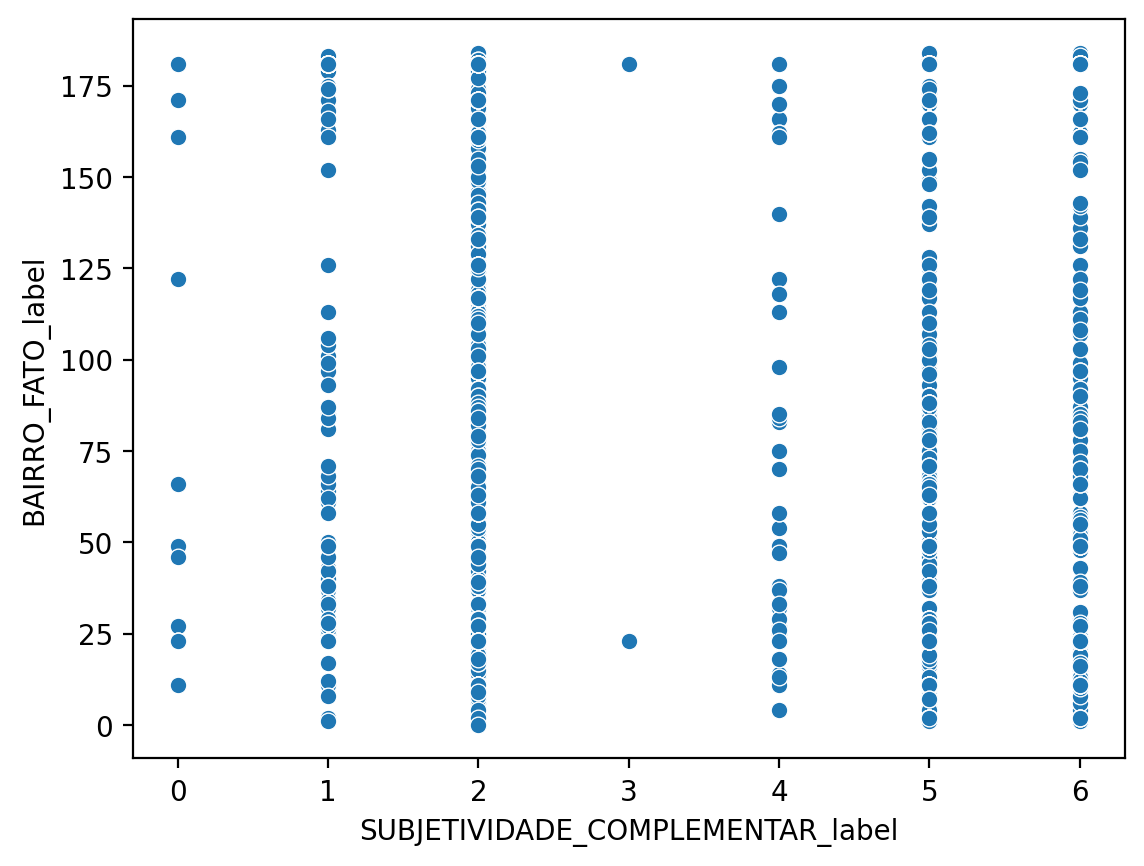

In [243]:
# Gráfico de dispersão utilizando os atributos conc e uptake, agrupamento pelo type
srn.scatterplot(
    data=dataset,
    x=dataset.SUBJETIVIDADE_COMPLEMENTAR_label,
    y=dataset.BAIRRO_FATO_label,
)

Árvore de Decisão classificadora


In [244]:
dataset

OBJECTID     ID           NIC SUBJETIVIDADE SUBJETIVIDADE_COMPLEMENTAR  \
0            14     26  20200.817994          CVLI                  Homicídio   
1           498     27  20200.817994          CVLI                  Homicídio   
2           137     28  20200.817994          CVLI                  Homicídio   
3           380     30  20200.817994          CVLI                  Homicídio   
4           429     29  20200.817994          CVLI                  Homicídio   
...         ...    ...           ...           ...                        ...   
19119    219627  53068  39710.000000          CVLI                  Homicídio   
19120    219759  53072  20200.817994          CVLI                  Homicídio   
19121    219760  53073  20200.817994          CVLI                  Homicídio   
19122    219765  53078  20200.817994          CVLI                  Homicídio   
19123    219770  53083  20200.817994          CVLI                  Homicídio   

      INSTRUMENTO_UTILIZADO     DATA_HORA_FATO  ANO_FATO  MES_FATO  \
0              ESPANCAMENTO  1/1/2012 01:00:00      2012         1   
1                    BRANCA  1/1/2012 02:45:00      2012         1   
2                       PAF  1/1/2012 03:00:00      2012         1   
3                       PAF  1/1/2012 05:00:00      2012         1   
4                       PAF  1/1/2012 05:00:00      2012         1   
...                     ...                ...       ...       ...   
19119                   PAF  7/5/2023 02:00:00      2023         5   
19120                   PAF  7/5/2023 04:00:00      2023         5   
19121                BRANCA  7/5/2023 07:33:00      2023         5   
19122                   PAF  7/5/2023 14:06:00      2023         5   
19123                   PAF  7/5/2023 21:35:00      2023         5   

      MES_FATO_TEXTO  ...                                            FORMATO  \
0                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-37.353172,-9.164467,-...   
1                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-35.4039,-9.0450000000...   
2                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-36.238403,-9.36336899...   
3                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-37.19284,-9.517126000...   
4                Jan  ...  "SDE"."ST_GEOMETRY"(1,1,-37.19284,-9.517126000...   
...              ...  ...                                                ...   
19119            Mai  ...                                                 NI   
19120            Mai  ...                                                 NI   
19121            Mai  ...                                                 NI   
19122            Mai  ...                                                 NI   
19123            Mai  ...                                                 NI   

      DIA_SEMANA_FATO_NUM  SUBJETIVIDADE_label  \
0                       1                    0   
1                       1                    0   
2                       1                    0   
3                       1                    0   
4                       1                    0   
...                   ...                  ...   
19119                   1                    0   
19120                   1                    0   
19121                   1                    0   
19122                   1                    0   
19123                   1                    0   

      SUBJETIVIDADE_COMPLEMENTAR_label INSTRUMENTO_UTILIZADO_label  \
0                                    2                           9   
1                                    2                           6   
2                                    2                          14   
3                                    2                          14   
4                                    2                          14   
...                                ...                         ...   
19119                                2                          14   
19120                                2                          14   
1

[Text(0.3684210526315789, 0.9, 'x[5] <= 1.5\ngini = 0.116\nsamples = 19124\nvalue = [1182, 17942]'),
 Text(0.15789473684210525, 0.7, 'x[5] <= 0.5\ngini = 0.008\nsamples = 263\nvalue = [262, 1]'),
 Text(0.10526315789473684, 0.5, 'x[8] <= 39.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.05263157894736842, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.15789473684210525, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.21052631578947367, 0.5, 'gini = 0.0\nsamples = 248\nvalue = [248, 0]'),
 Text(0.5789473684210527, 0.7, 'x[11] <= 67.5\ngini = 0.093\nsamples = 18861\nvalue = [920, 17941]'),
 Text(0.3684210526315789, 0.5, 'x[6] <= 13.5\ngini = 0.192\nsamples = 3296\nvalue = [354, 2942]'),
 Text(0.2631578947368421, 0.3, 'x[0] <= 2014.5\ngini = 0.264\nsamples = 894\nvalue = [140, 754]'),
 Text(0.21052631578947367, 0.1, 'gini = 0.378\nsamples = 265\nvalue = [67, 198]'),
 Text(0.3157894736842105, 0.1, 'gini = 0.205\nsamples = 629\nvalue = [73, 556]'),
 Text(0.473

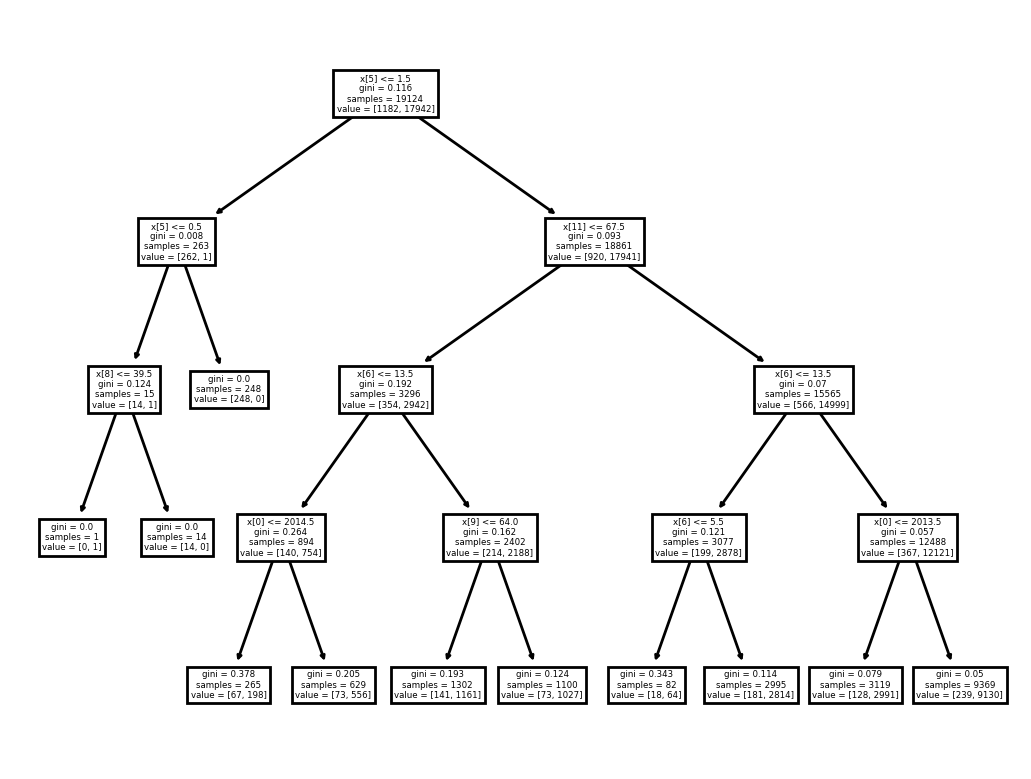

In [245]:
from sklearn.tree import plot_tree

plot_tree(tree_classifier)

## 5. Initialize dtreeviz model (adaptor)

To adapt dtreeviz to a specific model, use the `model()` function to get an adaptor. You'll need to provide the model, X/y data, feature names, target name, and target class names:


In [246]:
# modelo viz
viz_model = dtreeviz.model(
    tree_classifier,
    X_train=dataset[features],
    y_train=dataset[target],
    feature_names=features,
    target_name=target,
    class_names=[
        "Fem",
        "Mac",
    ],
)

In [247]:
# viz_model.instance_feature_importance(dataset)

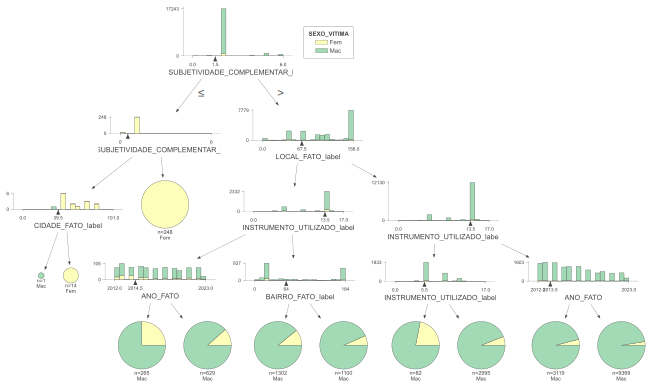

In [248]:
viz_model.view(scale=0.8)

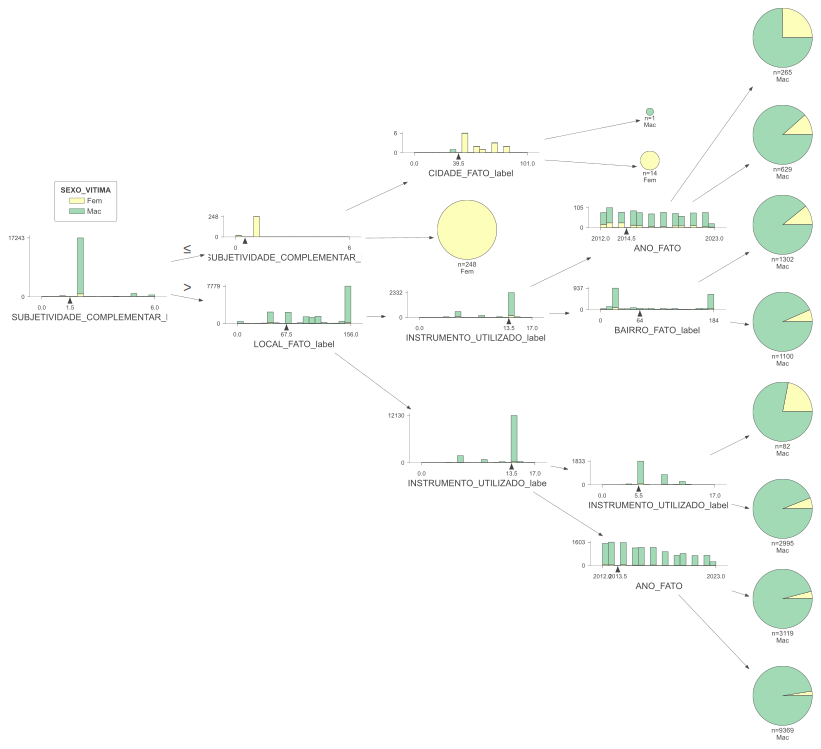

In [249]:
viz_model.view(orientation="LR")

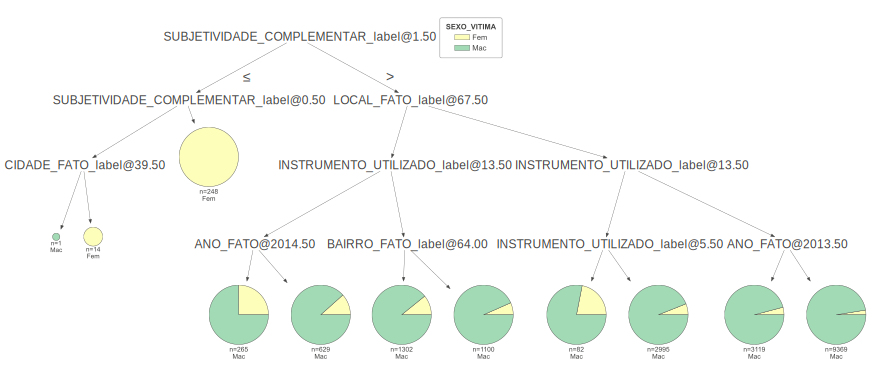

In [250]:
viz_model.view(fancy=False)

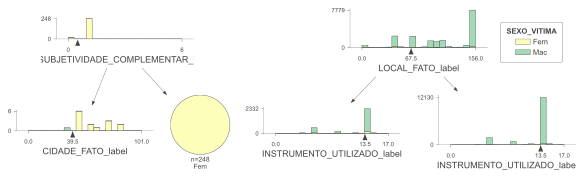

In [251]:
viz_model.view(depth_range_to_display=(1, 2))  # root is level 0

## 6. Explicações do caminho de previsão:

Para fins de interpretação, muitas vezes queremos entender como uma árvore se comporta para uma instância específica. Vamos escolher uma instância específica:


In [252]:
x = dataset[features].iloc[10]
x

ANO_FATO                            2012
MES_FATO                               1
DIA_SEMANA_FATO_NUM                    1
HORA_FATO                             15
SUBJETIVIDADE_label                    0
SUBJETIVIDADE_COMPLEMENTAR_label       2
INSTRUMENTO_UTILIZADO_label           14
COR_RACA_VITIMA_label                  4
CIDADE_FATO_label                     88
BAIRRO_FATO_label                    181
ESCOLARIDADE_VITIMA_label              4
LOCAL_FATO_label                     150
Name: 10, dtype: int64

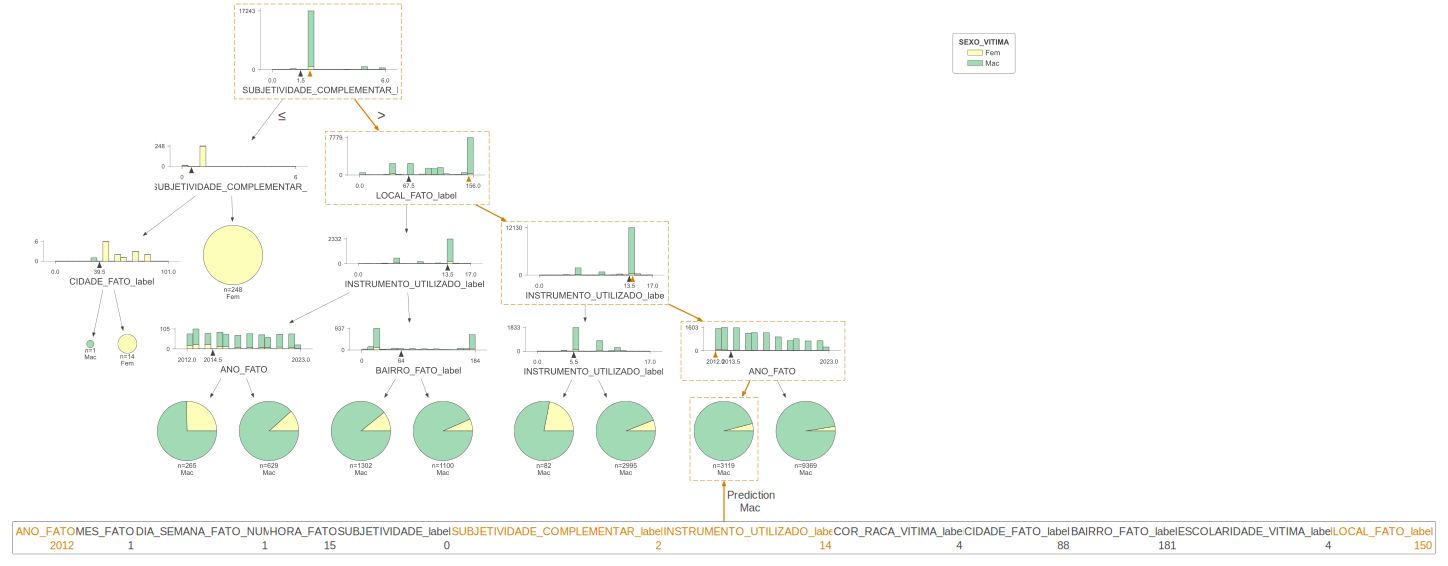

In [253]:
viz_model.view(x=x)

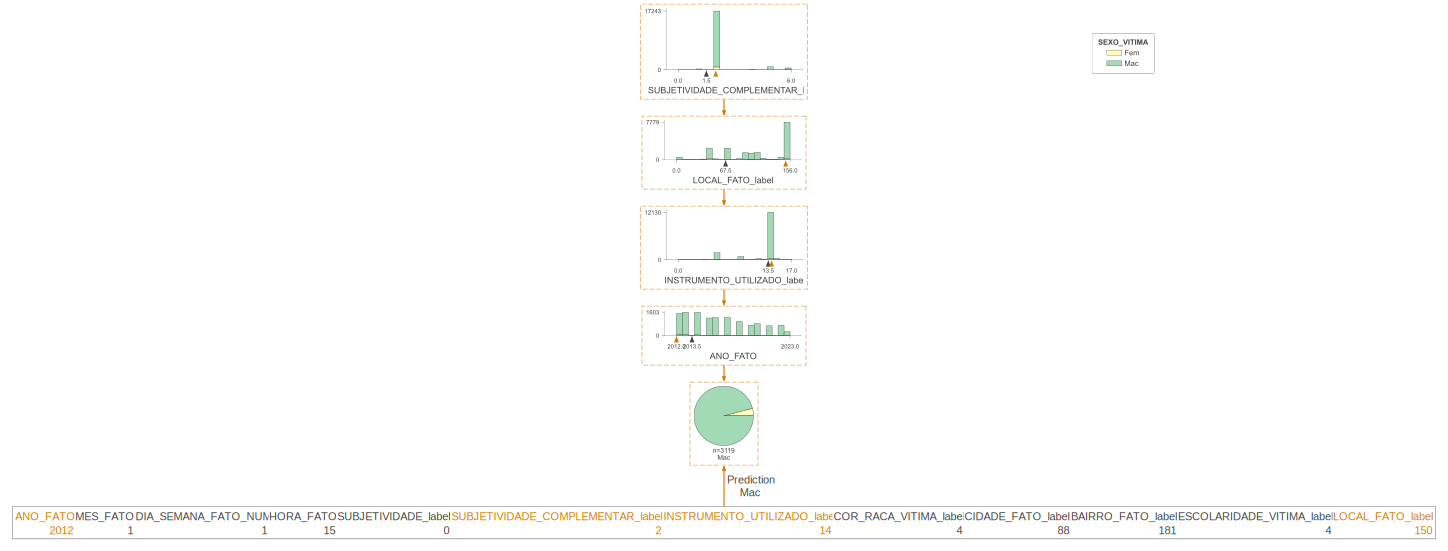

In [254]:
viz_model.view(x=x, show_just_path=True)

In [255]:
print(viz_model.explain_prediction_path(x))

ANO_FATO < 2013.5
1.5 <= SUBJETIVIDADE_COMPLEMENTAR_label 
13.5 <= INSTRUMENTO_UTILIZADO_label 
67.5 <= LOCAL_FATO_label 



Se você quiser a importância do recurso para uma instância específica, conforme calculado pela biblioteca da árvore de decisão subjacente, use `instance_feature_importance()`:


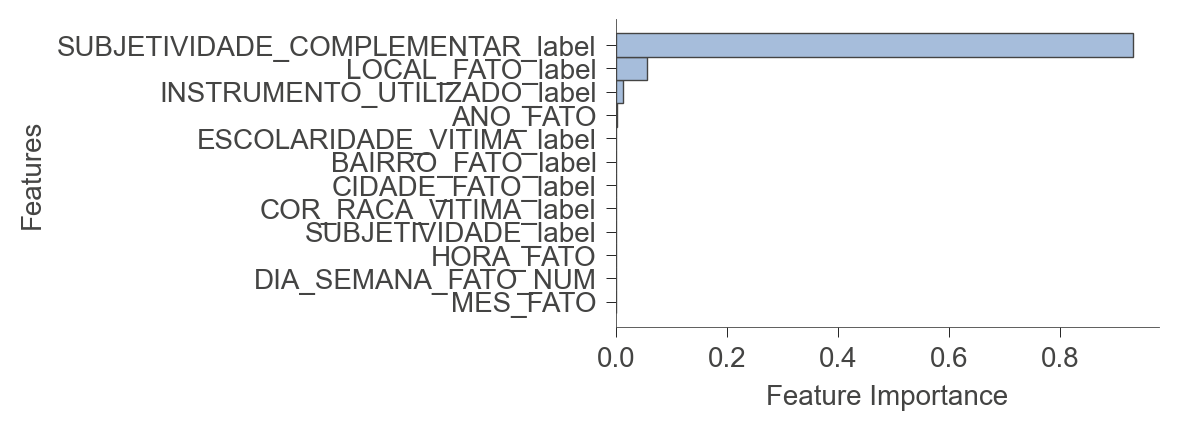

In [256]:
viz_model.instance_feature_importance(x, figsize=(3.5, 2))

## 7. Informações da folha

Existem várias funções para obter informações sobre as folhas da árvore.


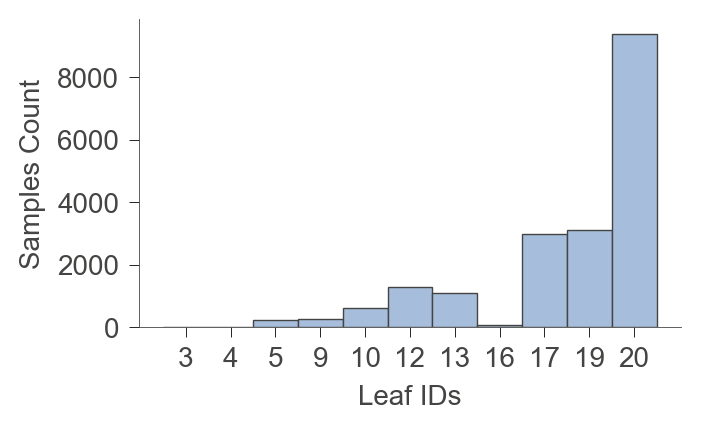

In [257]:
viz_model.leaf_sizes(figsize=(3.5, 2))

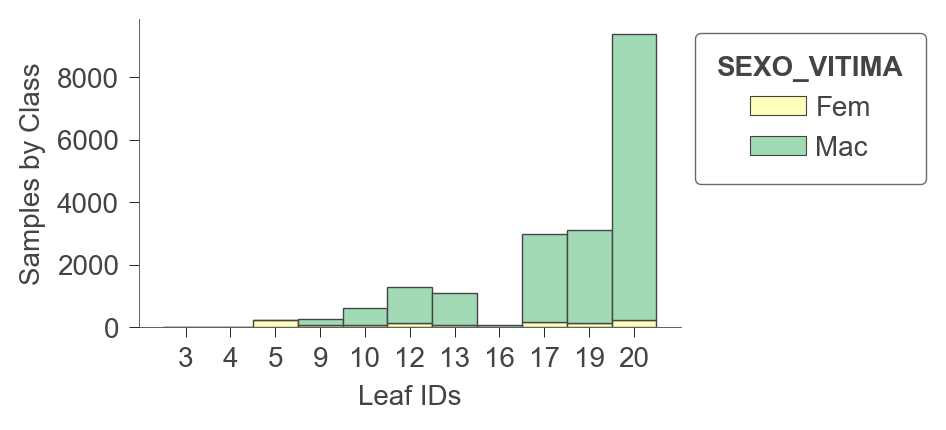

In [258]:
viz_model.ctree_leaf_distributions(figsize=(3.5, 2))

In [259]:
viz_model.node_stats(node_id=6)

ANO_FATO  MES_FATO  DIA_SEMANA_FATO_NUM  HORA_FATO  \
count      18861.0   18861.0              18861.0    18861.0   
mean   2016.379195  6.288055             3.946291  13.879964   
std       3.197195  3.565669             2.150619   6.952842   
min         2012.0       1.0                  1.0        0.0   
25%         2014.0       3.0                  2.0        8.0   
50%         2016.0       6.0                  4.0       16.0   
75%         2019.0       9.0                  6.0       20.0   
max         2023.0      12.0                  7.0       23.0   

       SUBJETIVIDADE_label  SUBJETIVIDADE_COMPLEMENTAR_label  \
count              18861.0                           18861.0   
mean                   0.0                          2.280102   
std                    0.0                          0.930661   
min                    0.0                               2.0   
25%                    0.0                               2.0   
50%                    0.0                               2.0   
75%                    0.0                               2.0   
max                    0.0                               6.0   

       INSTRUMENTO_UTILIZADO_label  COR_RACA_VITIMA_label  CIDADE_FATO_label  \
count                      18861.0                18861.0            18861.0   
mean                     12.625046               3.630772          48.709241   
std                       2.903469               1.077503          27.432415   
min                            0.0                    0.0                0.0   
25%                           14.0                    4.0               35.0   
50%                           14.0                    4.0               45.0   
75%                           14.0                    4.0               70.0   
max                           17.0                    5.0              101.0   

       BAIRRO_FATO_label  ESCOLARIDADE_VITIMA_label  LOCAL_FATO_label  
count            18861.0                    18861.0           18861.0  
mean           89.412491                    3.40825        108.542124  
std            70.559276                     1.0925         43.268229  
min                  0.0                        0.0               0.0  
25%                 23.0                        3.0              71.0  
50%                 58.0                        4.0             113.0  
75%                181.0                        4.0             150.0  
max                184.0                        5.0             156.0

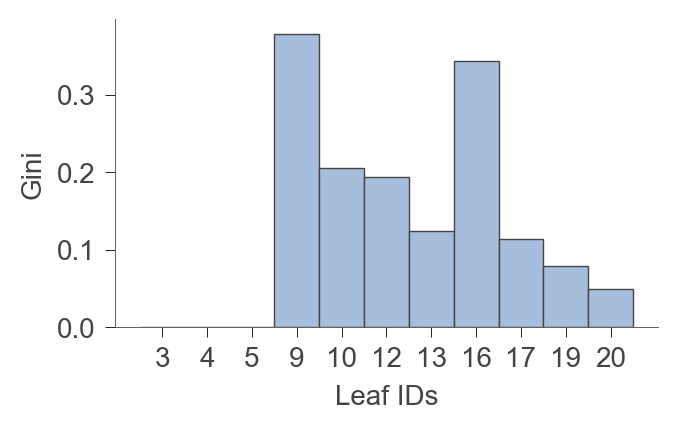

In [260]:
viz_model.leaf_purity(figsize=(3.5, 2))

## 8. Regressores

Para demonstrar a visualização da árvore do regressor, começamos criando um modelo de regressores que prediz a idade em vez da sobrevivência:


In [261]:
features_reg = [
    "ANO_FATO",
    "MES_FATO",
    "DIA_SEMANA_FATO_NUM",
    "HORA_FATO",
    "SUBJETIVIDADE_label",
    "SUBJETIVIDADE_COMPLEMENTAR_label",
    "INSTRUMENTO_UTILIZADO_label",
    "COR_RACA_VITIMA_label",
    "CIDADE_FATO_label",
    "BAIRRO_FATO_label",
    "ESCOLARIDADE_VITIMA_label",
    "LOCAL_FATO_label",
    "SEXO_VITIMA",
]

target_reg = "IDADE_VITIMA"

tree_regressor = DecisionTreeRegressor(
    max_depth=3, random_state=random_state, criterion="absolute_error"
)
tree_regressor.fit(dataset[features_reg].values, dataset[target_reg].values)

ValueError: could not convert string to float: 'NI'

In [ ]:
viz_rmodel = dtreeviz.model(
    model=tree_regressor,
    X_train=dataset[features_reg],
    y_train=dataset[target_reg],
    feature_names=features_reg,
    target_name=target_reg,
)

In [ ]:
viz_rmodel.view()

In [ ]:
viz_rmodel.view(orientation="LR")

# IV - Treinamento e predição com DecisionTree e AdaBoost Regressors

Agora, definimos os classificadores e os ajustamos aos dados.
Em seguida, prevemos os mesmos dados para ver como eles poderiam se ajustar.
O primeiro regressor é um `DecisionTreeRegressor` com `max_depth=4`.
O segundo regressor é um `AdaBoostRegressor` com um `DecisionTreeRegressor`
de `max_depth=4` como aprendiz base e será construído com `n_estimators=300`
desses alunos básicos.


Iniciando


In [ ]:
%matplotlib inline

import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

rng = np.random.RandomState(1)

X = dataset[features_reg]
y = dataset[target_reg]

regr_1 = DecisionTreeRegressor(max_depth=4)

regr_2 = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng
)

regr_1.fit(X, y)
regr_2.fit(X, y)

y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

Finalmente, plotamos quão bem nossos dois regressores,
regressor de árvore de decisão única e regressor AdaBoost, poderia ajustar os dados.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("colorblind")

plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y_1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, color=colors[2], label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

# V - Padrão


## 1. Iniciando


## 2. Preparação dos dados


In [ ]:
# atribuir os valores das variáveis independentes a 'X'

# atribuir os valores da variável dependente a 'y'

In [ ]:
# Dividir o dataset entre treino e teste

## 3- Treinar o modelo


In [ ]:
# Entre código aqui...

# instanciar modelo


# treinar modelo com dados de treino

## 4- Testar o modelo (inferência)


In [ ]:
# fazer predição da espécie para uma nova flor com as dimensões: [5.1, 3.5, 1.4, 0.2]

In [ ]:
# mostrar resultado da predição

## 5- Avaliar o modelo


In [ ]:
# mostrar score

In [ ]:
# mostrar matrix de confusão ou Curva ROC